# 데이터 WAVE

In [2]:
from preamble import *
from sklearn.model_selection import train_test_split

Text(0, 0.5, '타깃')

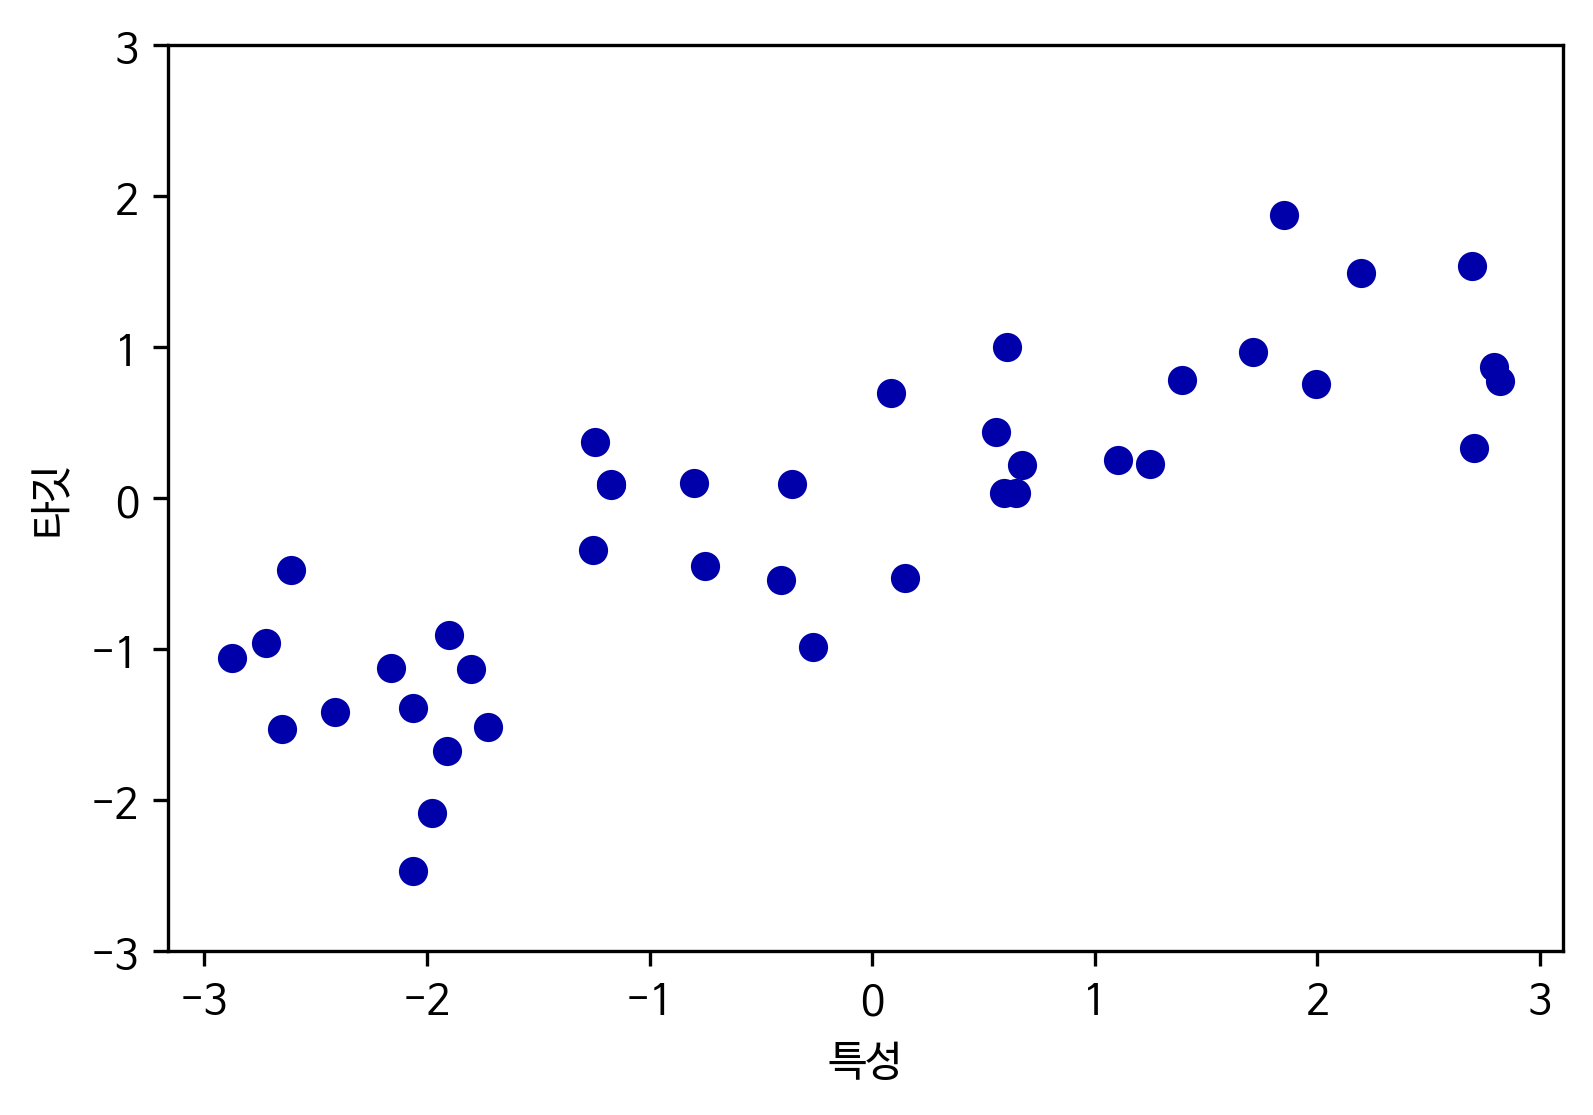

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

# KNN 회귀 분석(Regression)

In [4]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [5]:
print("테스트 세트 예측 : \n", reg.predict(X_test))

테스트 세트 예측 : 
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [6]:
print("테스트 세트 R^2 : {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2 : 0.83


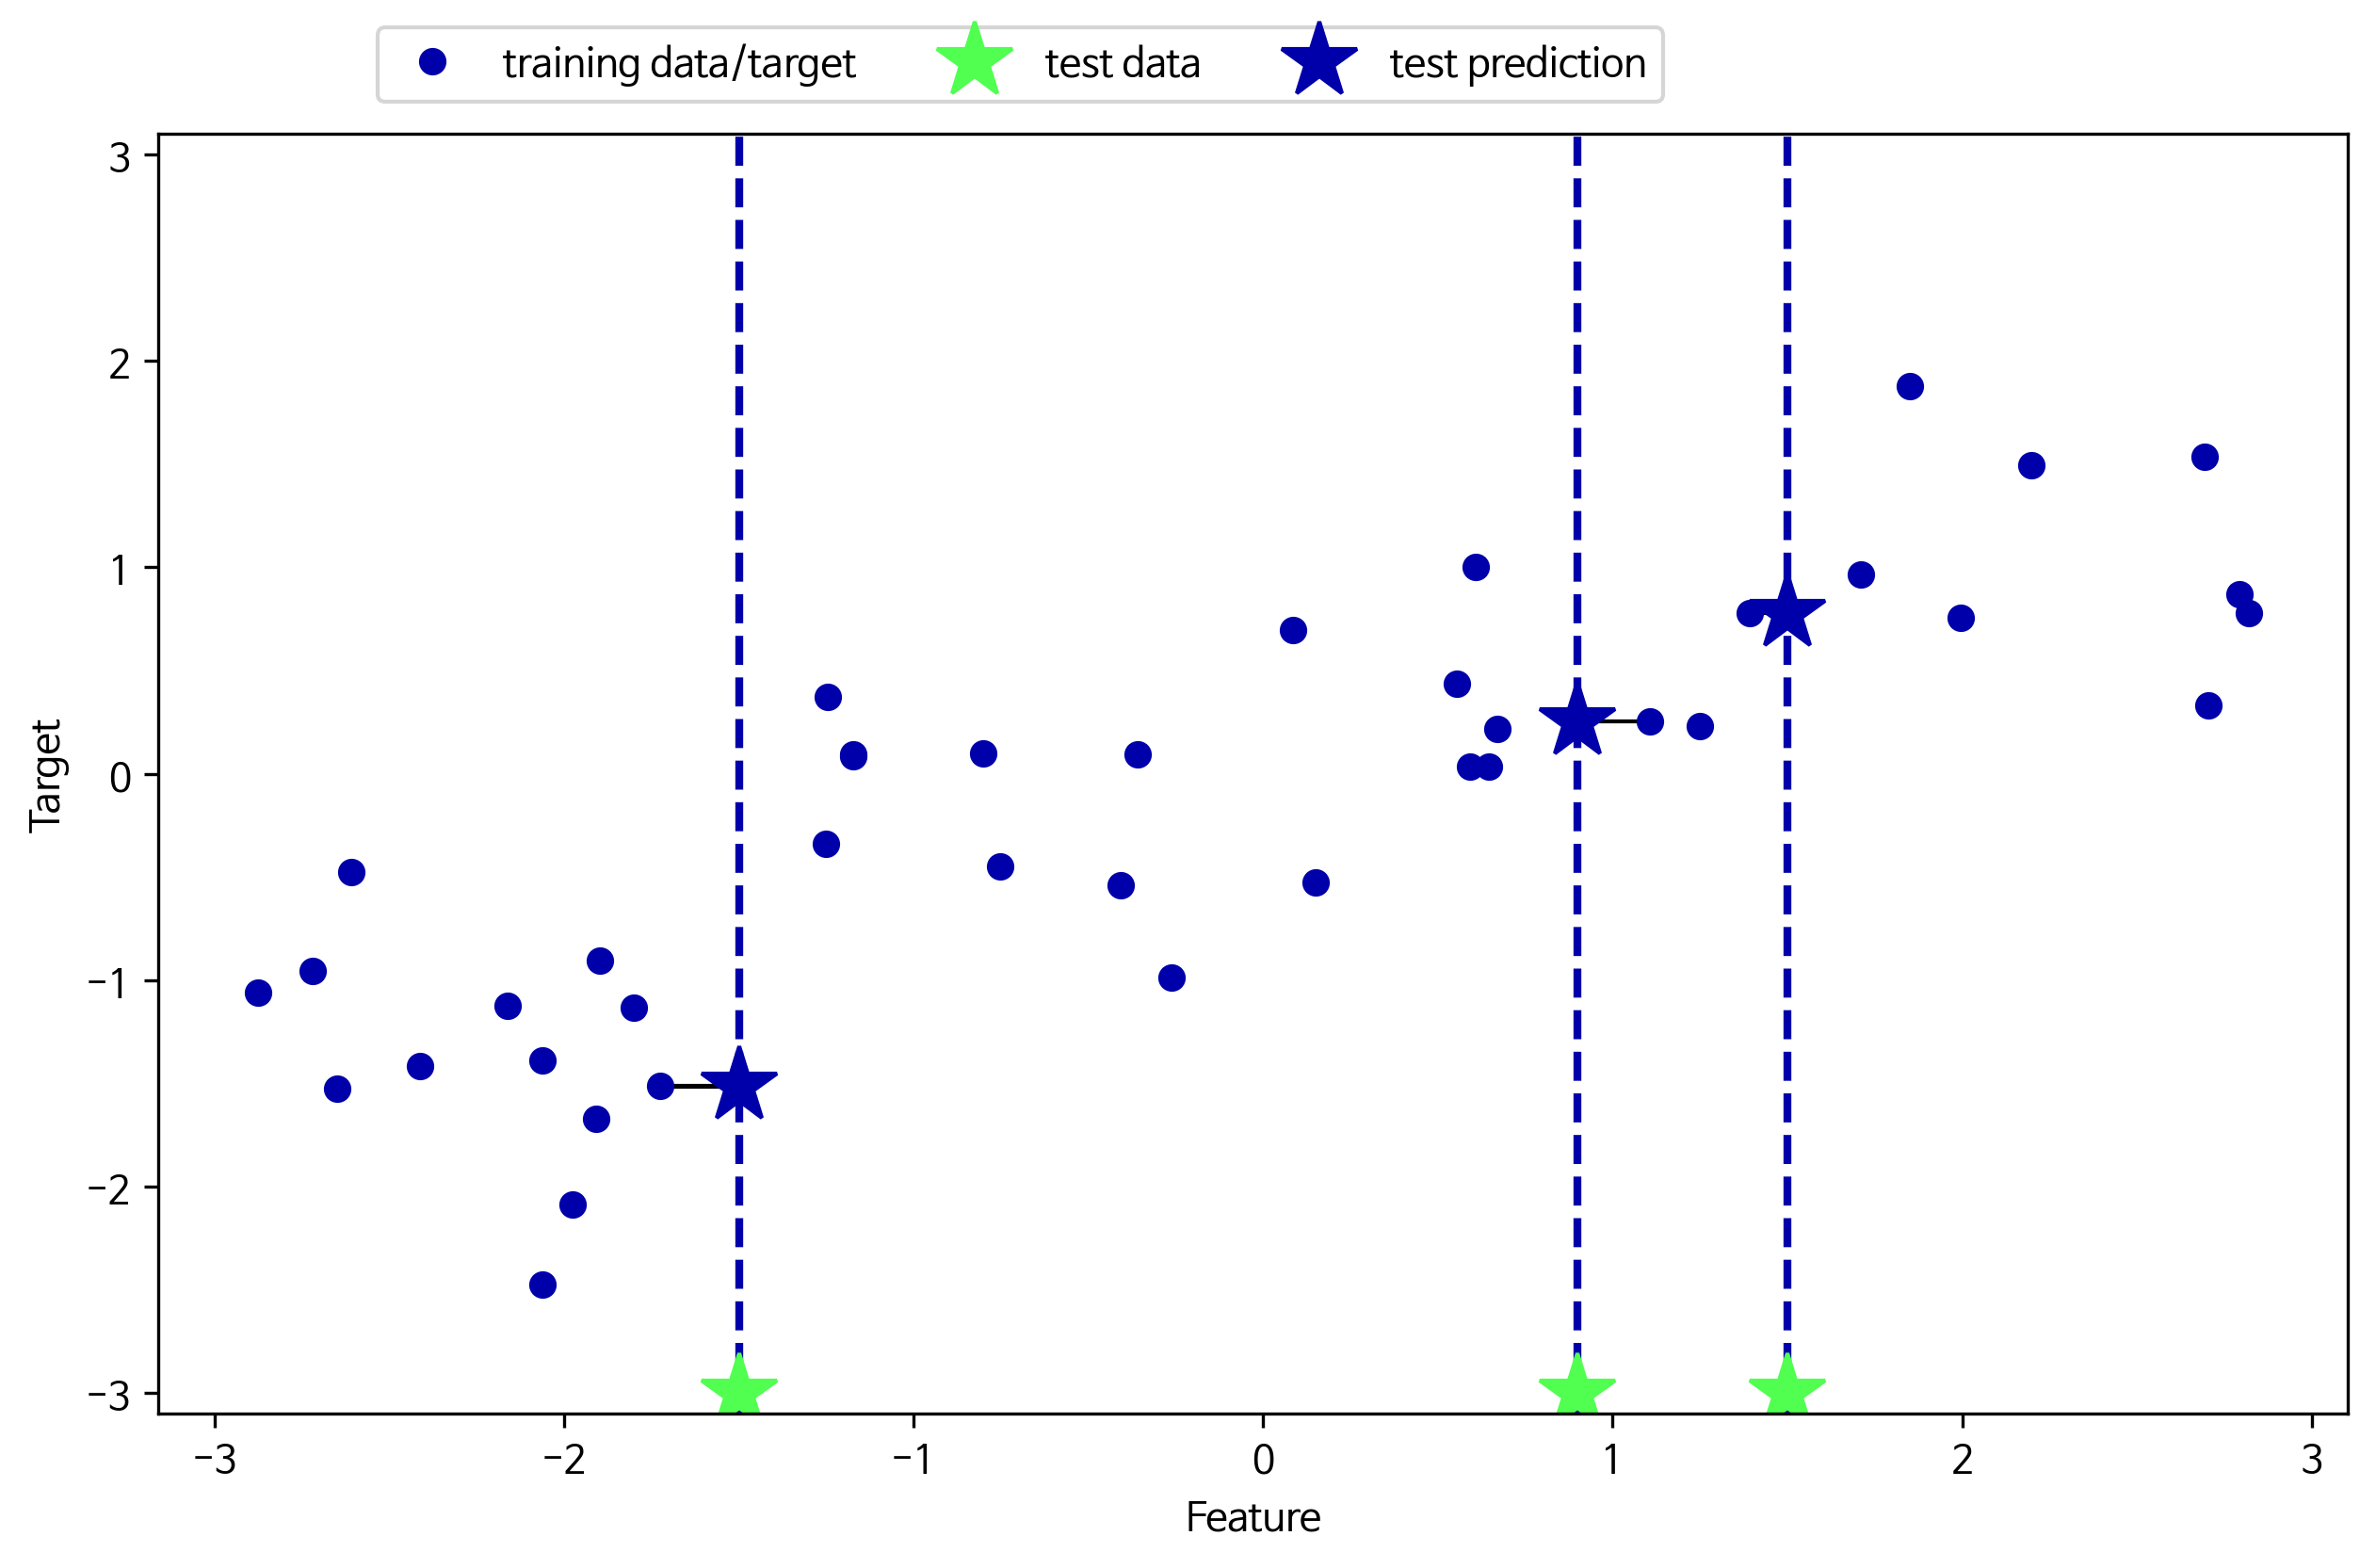

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

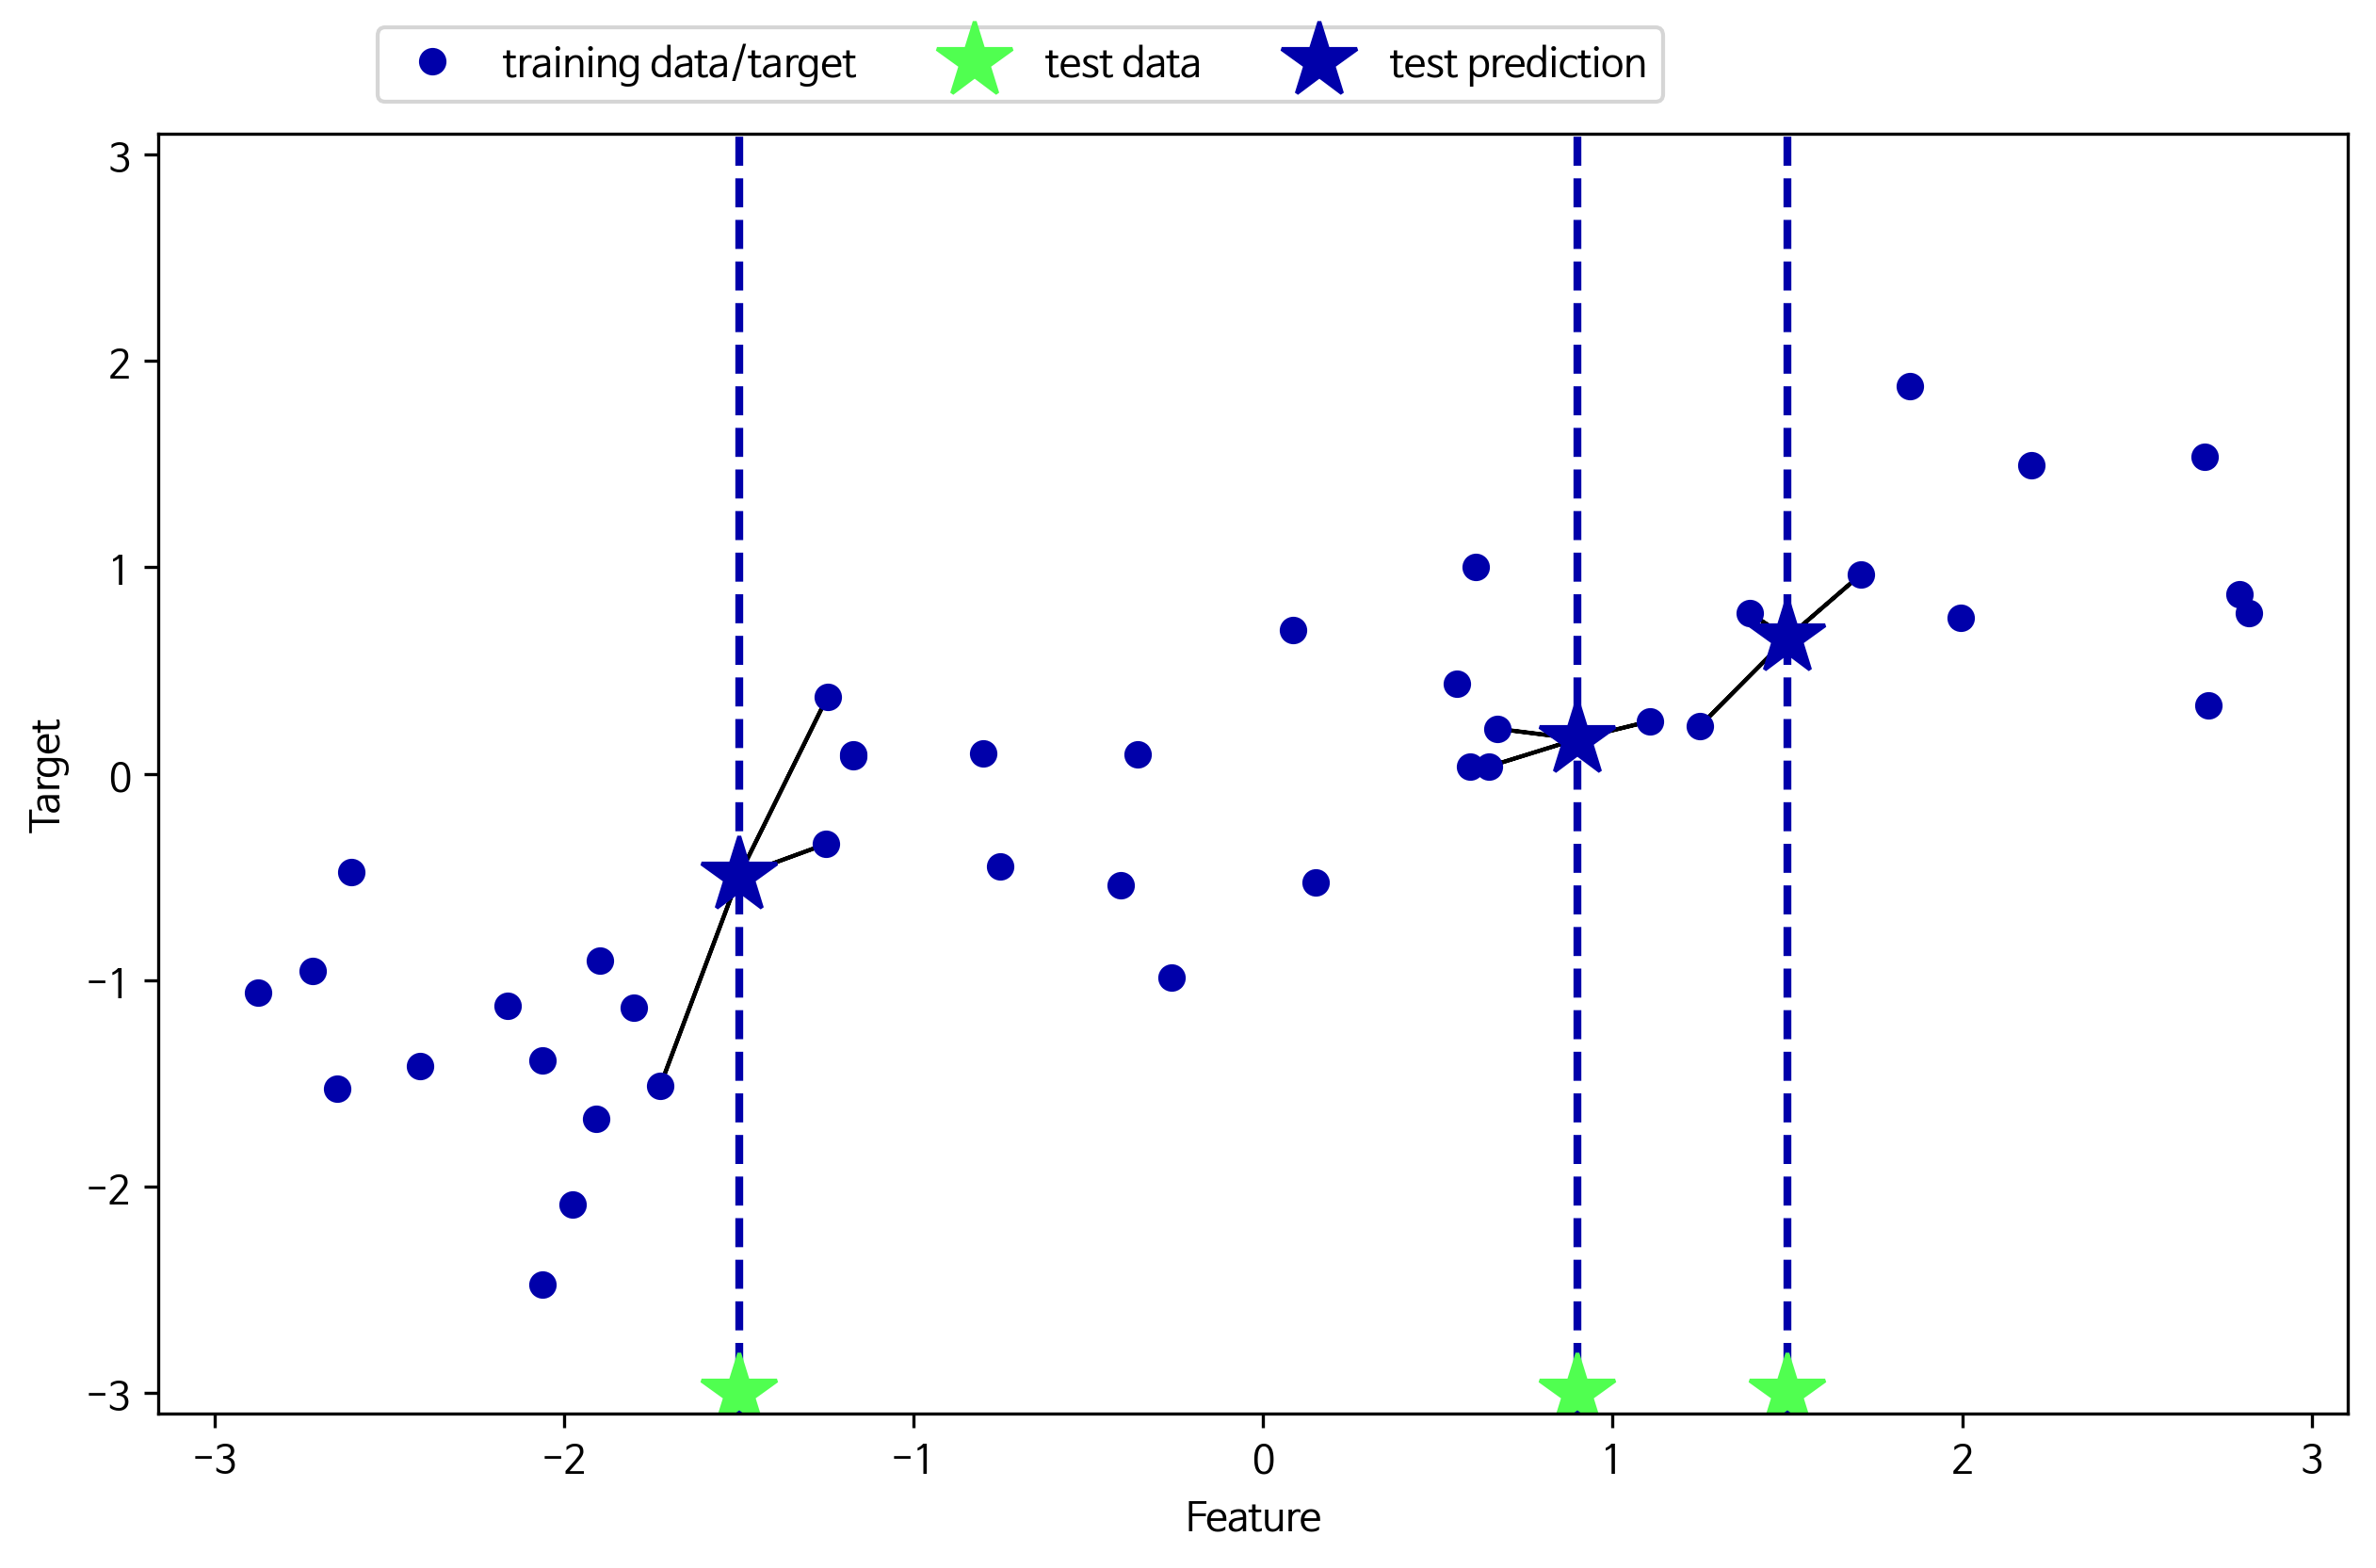

In [8]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

# test_size에 대한 고찰

In [9]:
X, y = mglearn.datasets.make_wave(n_samples=40)

for test_size in range(1, 6):
    test_size /= 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=test_size)

    reg = KNeighborsRegressor(n_neighbors=3)
    reg.fit(X_train, y_train)

    print("test_size : {}, R^2 : {:.2f}".format(test_size, reg.score(X_test, y_test)))

test_size : 0.1, R^2 : 0.84
test_size : 0.2, R^2 : 0.82
test_size : 0.3, R^2 : 0.70
test_size : 0.4, R^2 : 0.68
test_size : 0.5, R^2 : 0.56


test_size가 커질수록 결정계수가 감소하는 것을 볼 수 있다. 테스트 데이터의 크기가 커질수록 훈련 데이터의 양이 줄어들기 때문에 예측이 힘들 것이라고 생각할 수 있다. 그렇다고 테스트 데이터를 너무 작게 하면 평가 해볼 데이터가 적다는 뜻이고 이는 훈련 데이터에 과대적합됬음에도 제대로된 평가가 힘들 수 있다. 따라서 test_size는 내가 해결해야 하는 문제와 주어진 데이터의 수에 맞게 지정해야 할 것이다.

# 성능측정

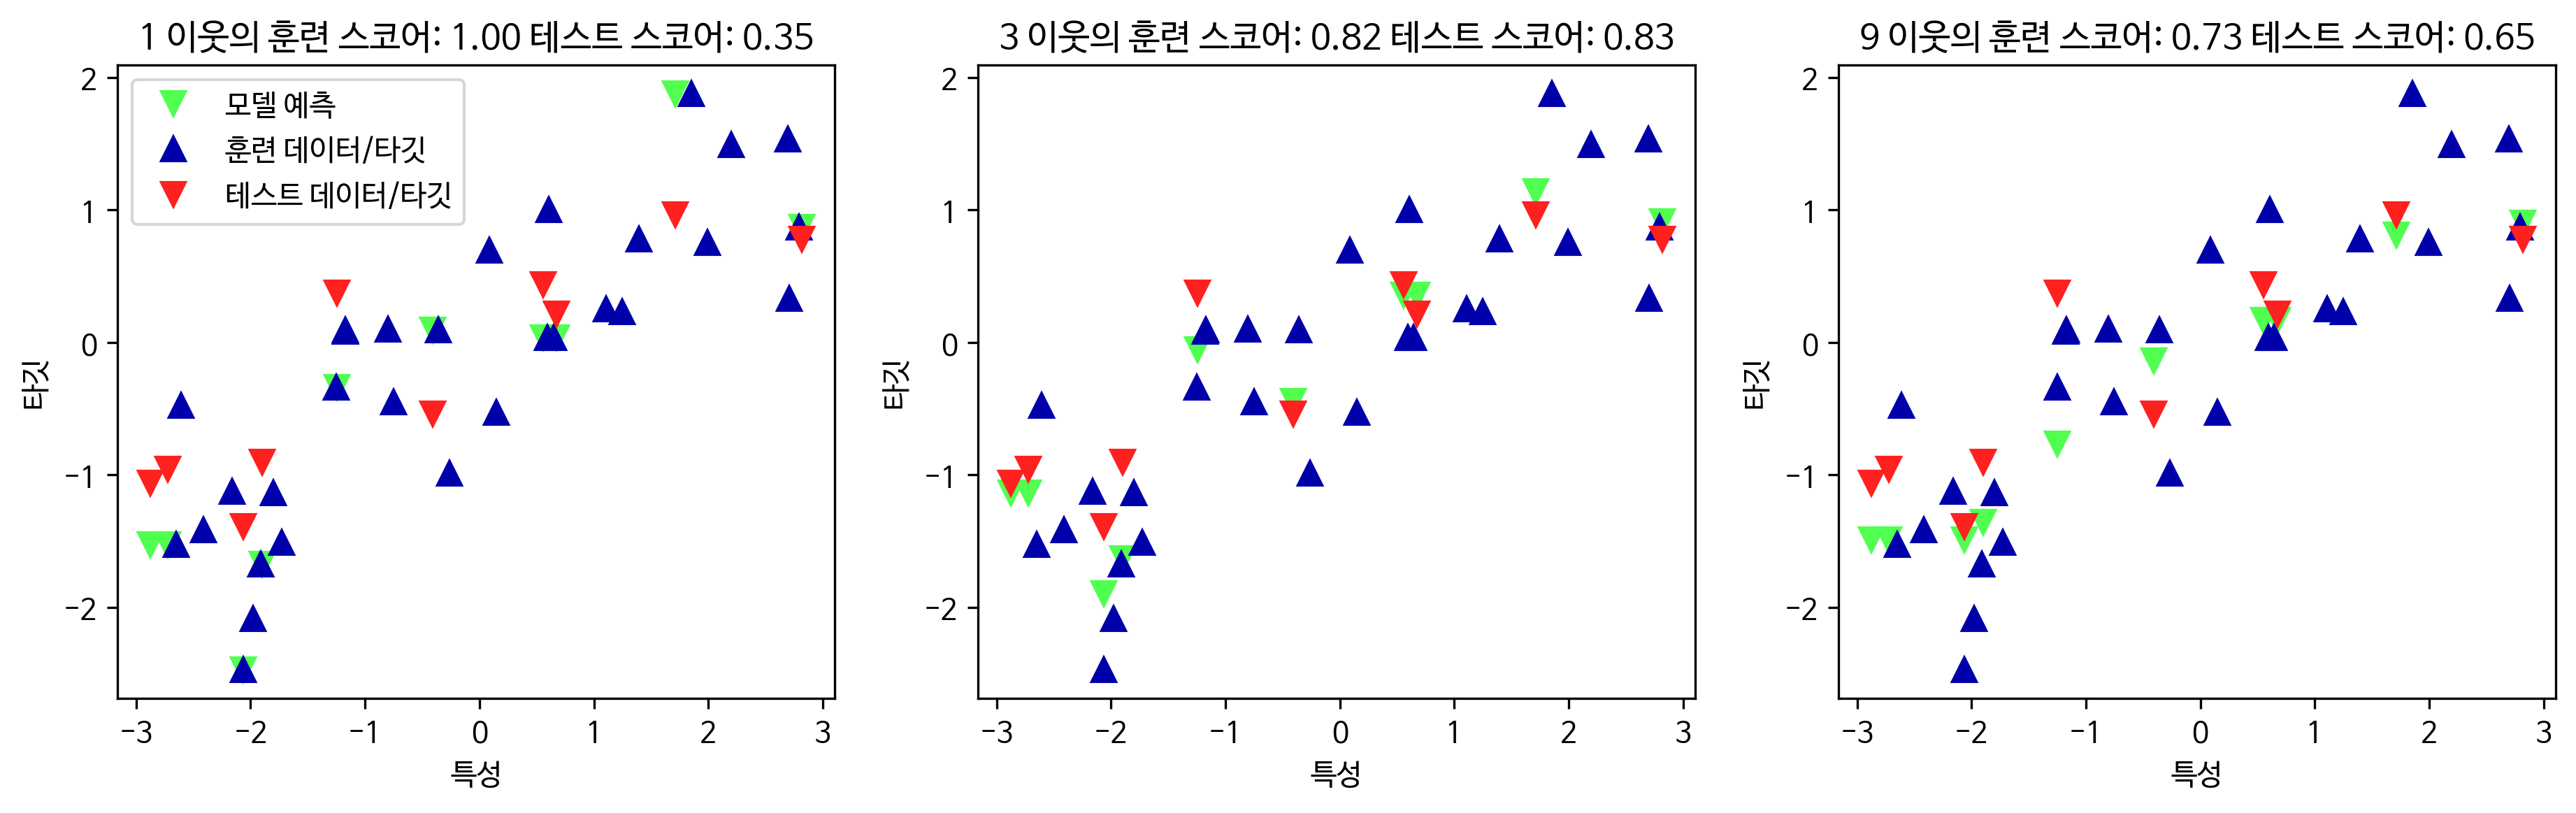

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm3(2), markersize=8)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

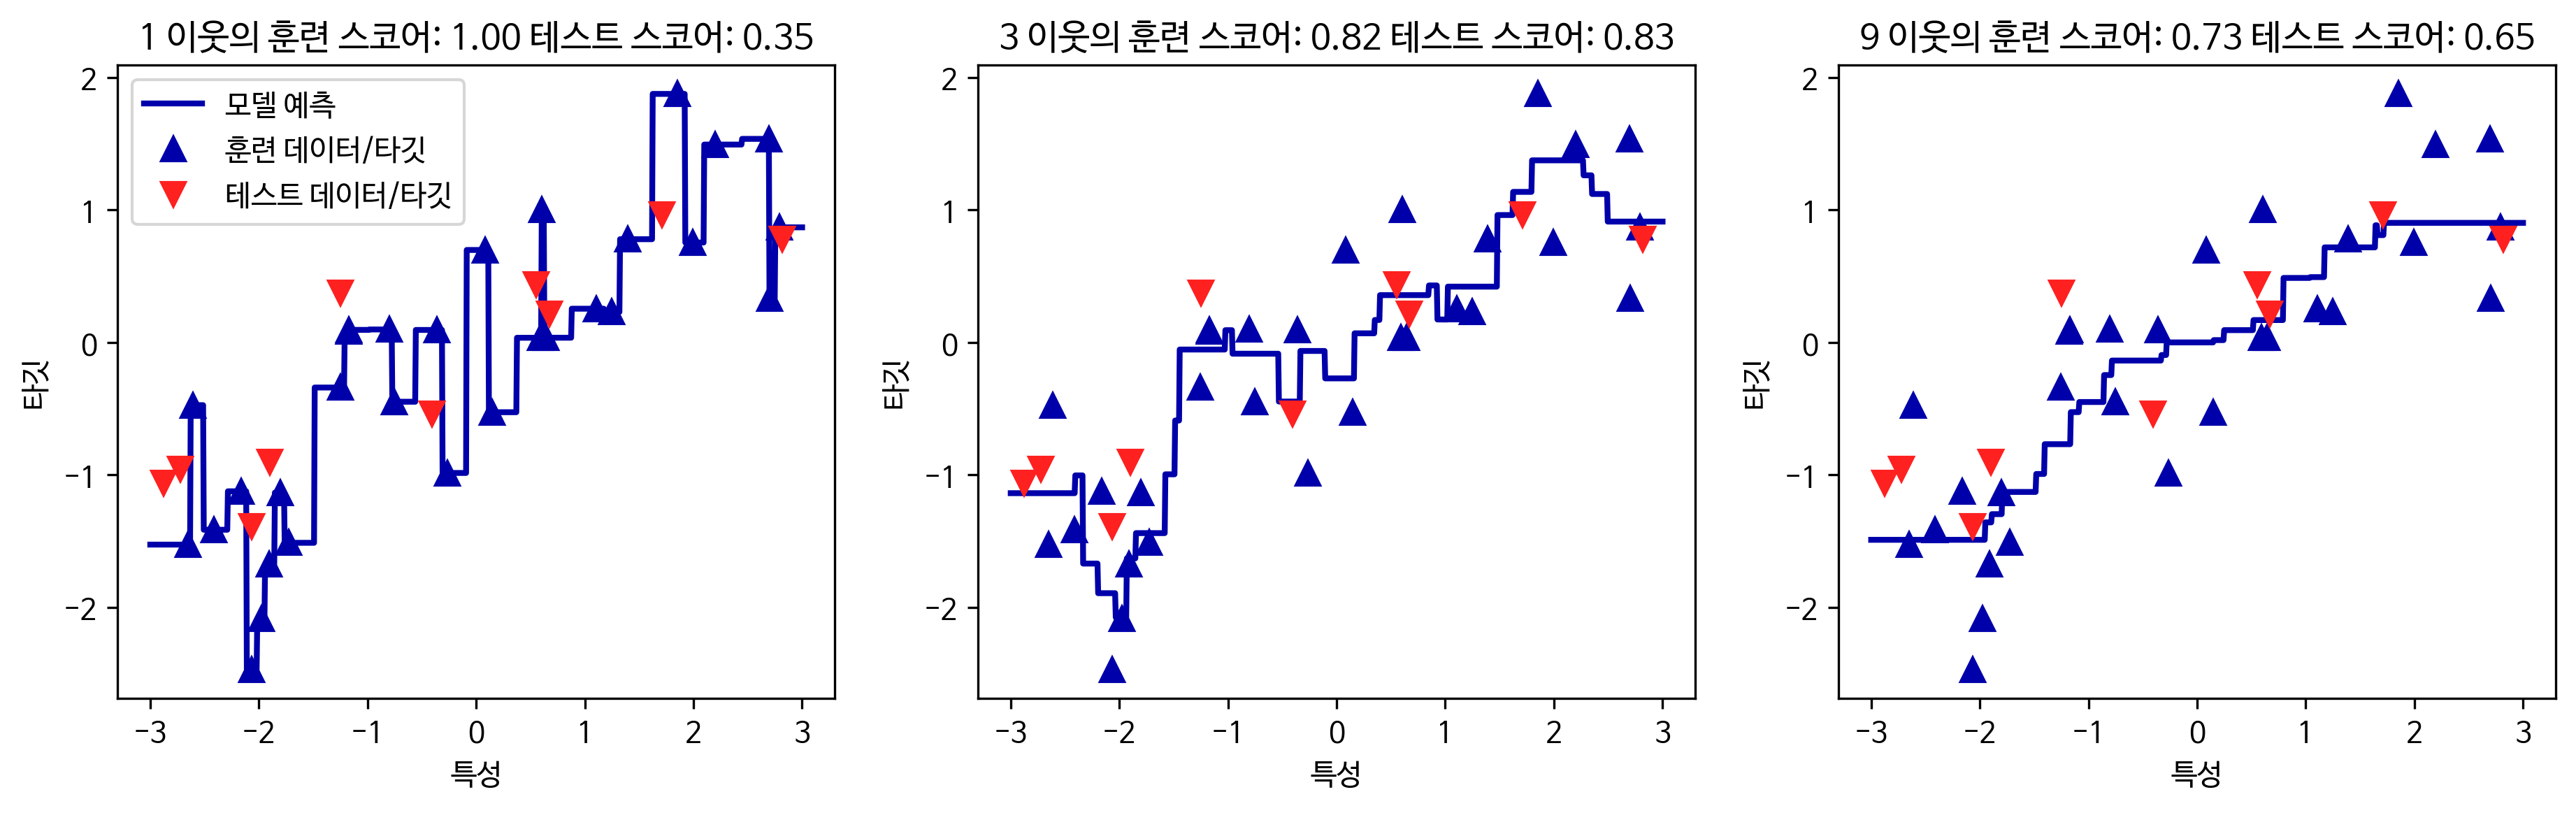

In [11]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

# 선형 회귀 : 기울기, 절편구하기

In [12]:
# x값과 y값
x=[2, 4, 6, 8]
y=[81, 93, 91, 97]

# x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)
print("x의 평균값 : ", mx)
print("y의 평균값 :", my)

# 기울기 공식의 분모
divisor = sum([(mx - i)**2 for i in x])

# 기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)

print("분모 : ", divisor)
print("분자 : ", dividend)

# 기울기와 y절편 구하기
a = dividend / divisor
b = my - mx * a

# 출력으로 확인
print("기울기 a = ", a)
print("y절편 b = ", b)

x의 평균값 :  5.0
y의 평균값 : 90.5
분모 :  20.0
분자 :  46.0
기울기 a =  2.3
y절편 b =  79.0


# 선형 회귀 : 평균제곱근오차

In [16]:
import numpy as np
# 기울기 a와 y절편 b
ab = [3, 76]

# x, y의 데이터 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# y = ax + b에 a 와 b 값을 대입하여 결과를 출력하는 함수
def predict(x):
    return ab[0]*x + ab[1]

# RMSE 함수
def rmse(p, a):
    return np.sqrt(((p - a) ** 2).mean())

# RMSE 함수를 각 y값에 대입하여 최종 값을 구하는 함수
def rmse_val(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))

# 예측 값이 들어갈 빈 리스트
predict_result = []

# 모든 x값을 한 번씩 대입하여
for i in range(len(x)):
    # predict_result 리스트를 완성한다
    predict_result.append(predict(x[i]))
    print("공부한 시간 = %.f, 실제 점수 = %.f, 예측 점수 = %.f"%(x[i], y[i], predict(x[i])))

# 최종 RMSE 출력
print("rmse 최종값 : " + str(rmse_val(predict_result, y)))

공부한 시간 = 2, 실제 점수 = 81, 예측 점수 = 82
공부한 시간 = 4, 실제 점수 = 93, 예측 점수 = 88
공부한 시간 = 6, 실제 점수 = 91, 예측 점수 = 94
공부한 시간 = 8, 실제 점수 = 97, 예측 점수 = 100
rmse 최종값 : 3.3166247903554


# 선형회귀(Linear Regression)

In [17]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [19]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


In [20]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


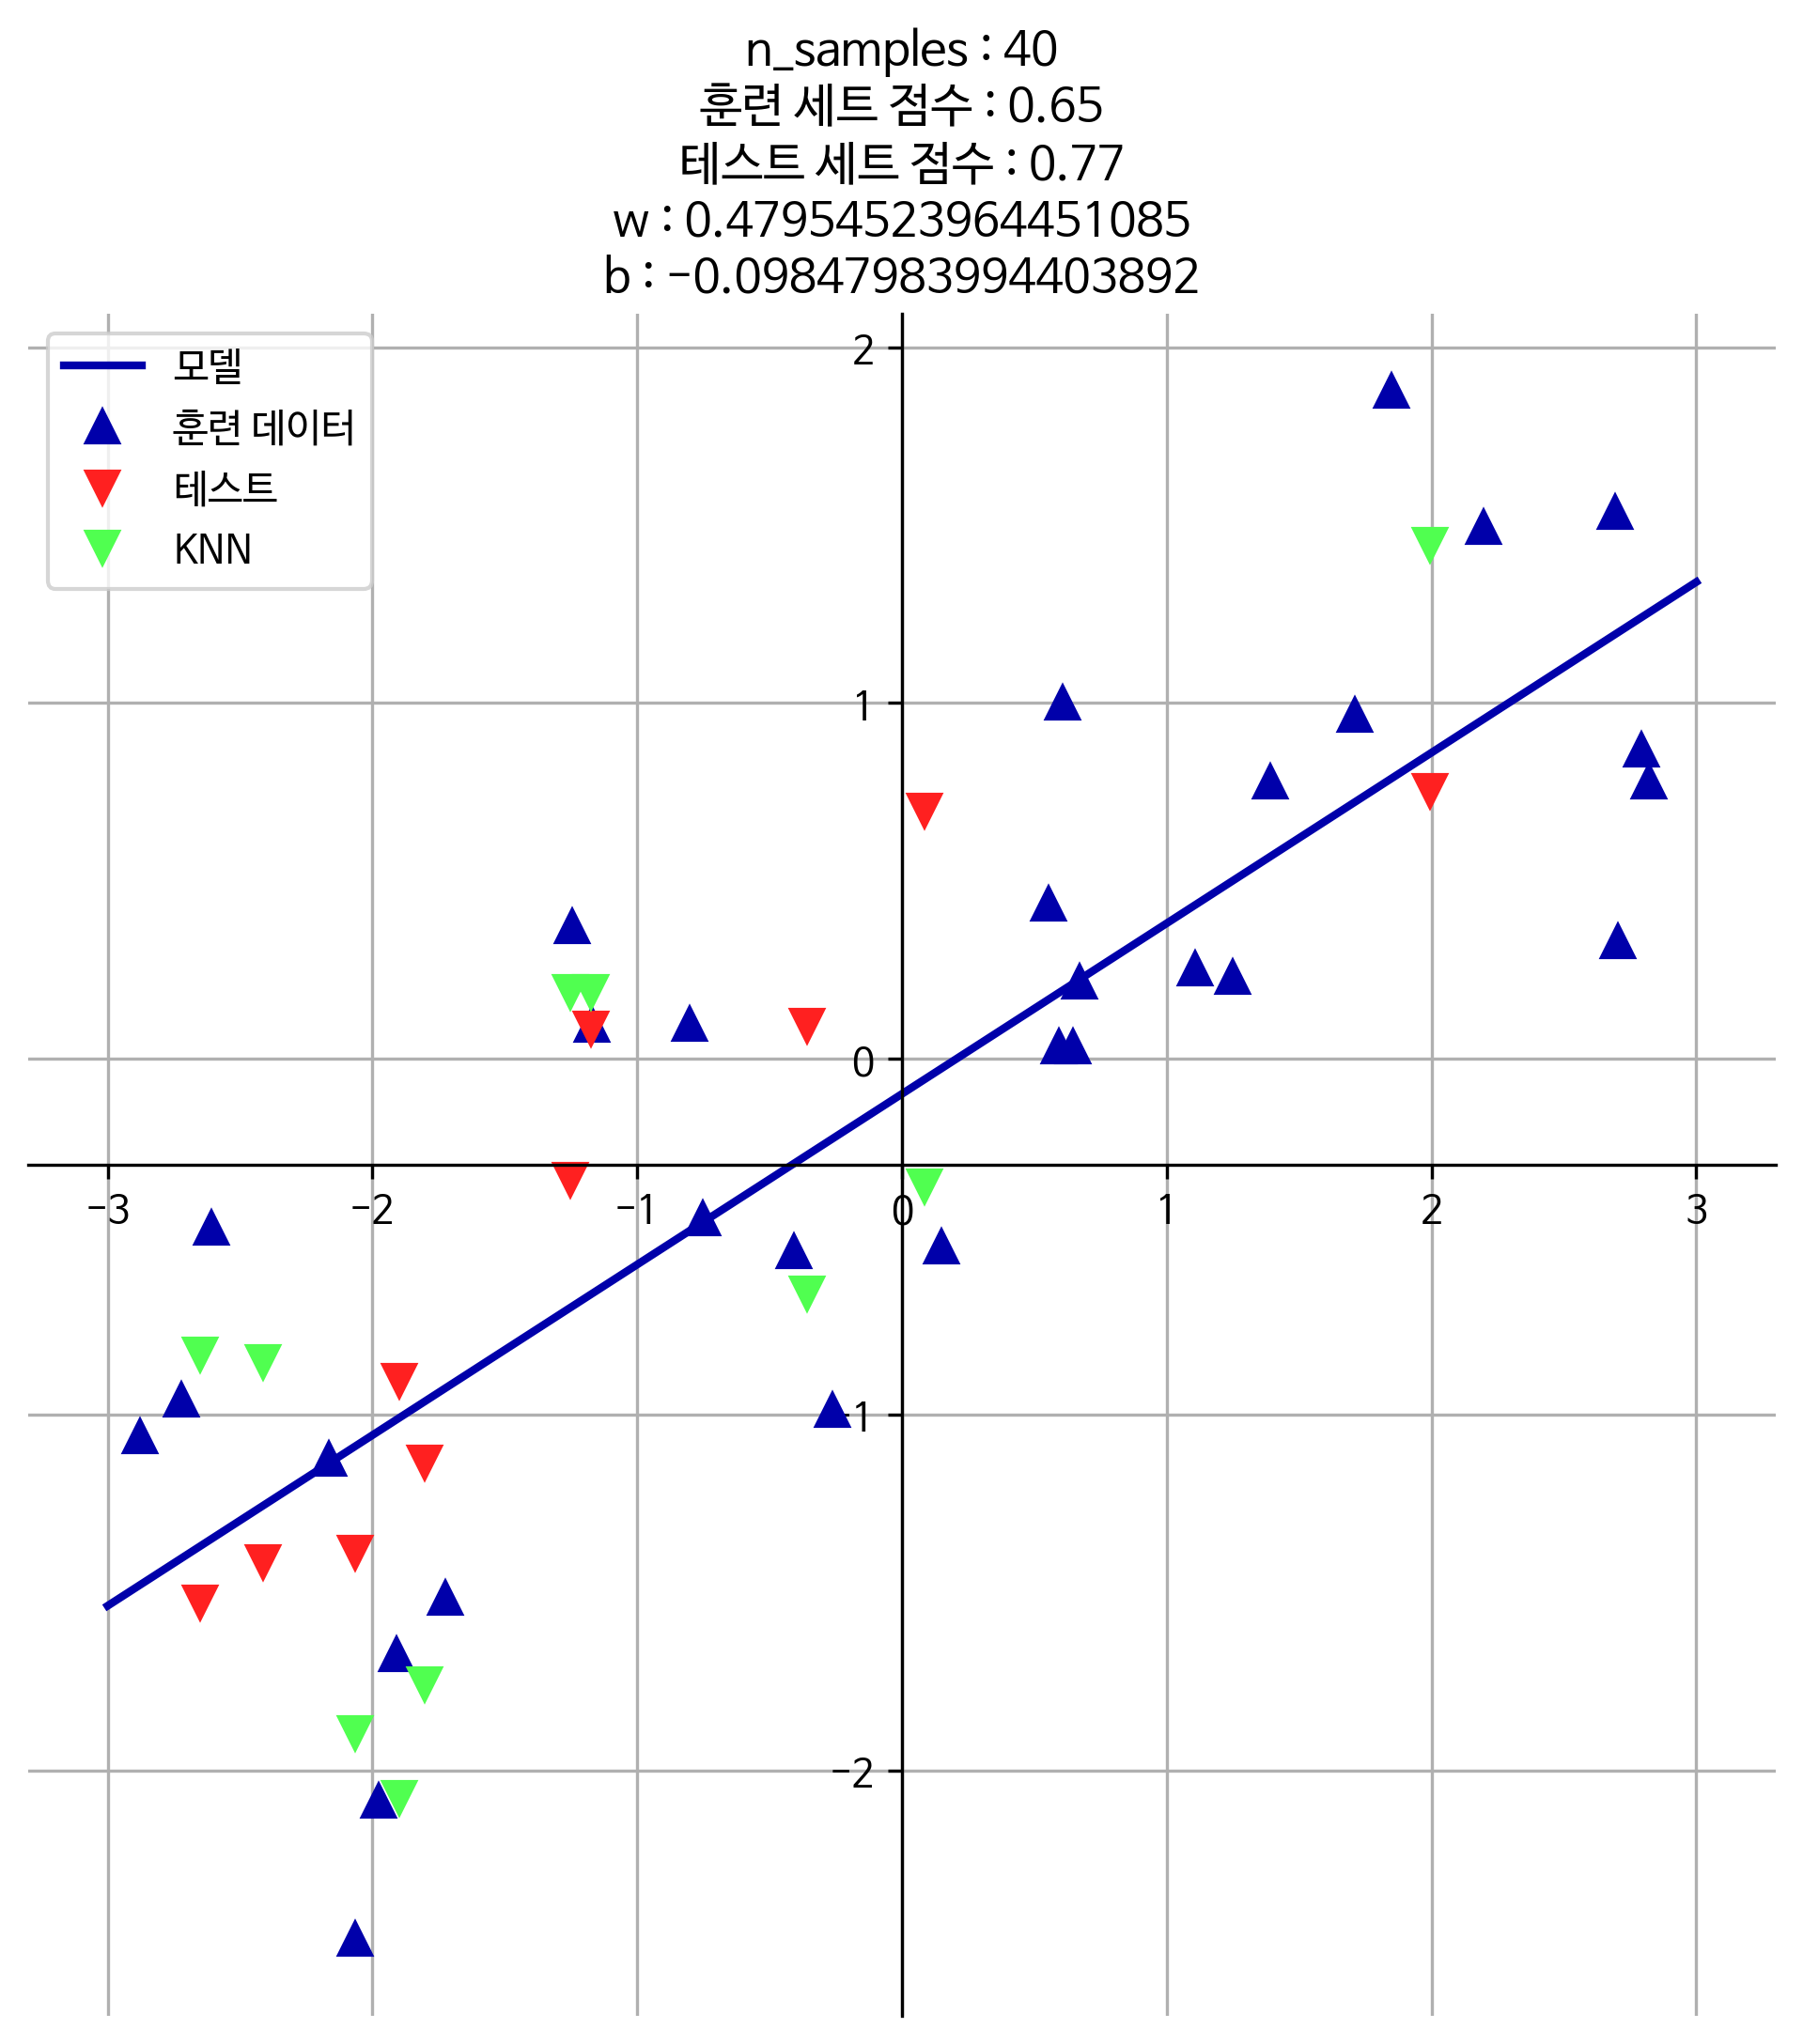

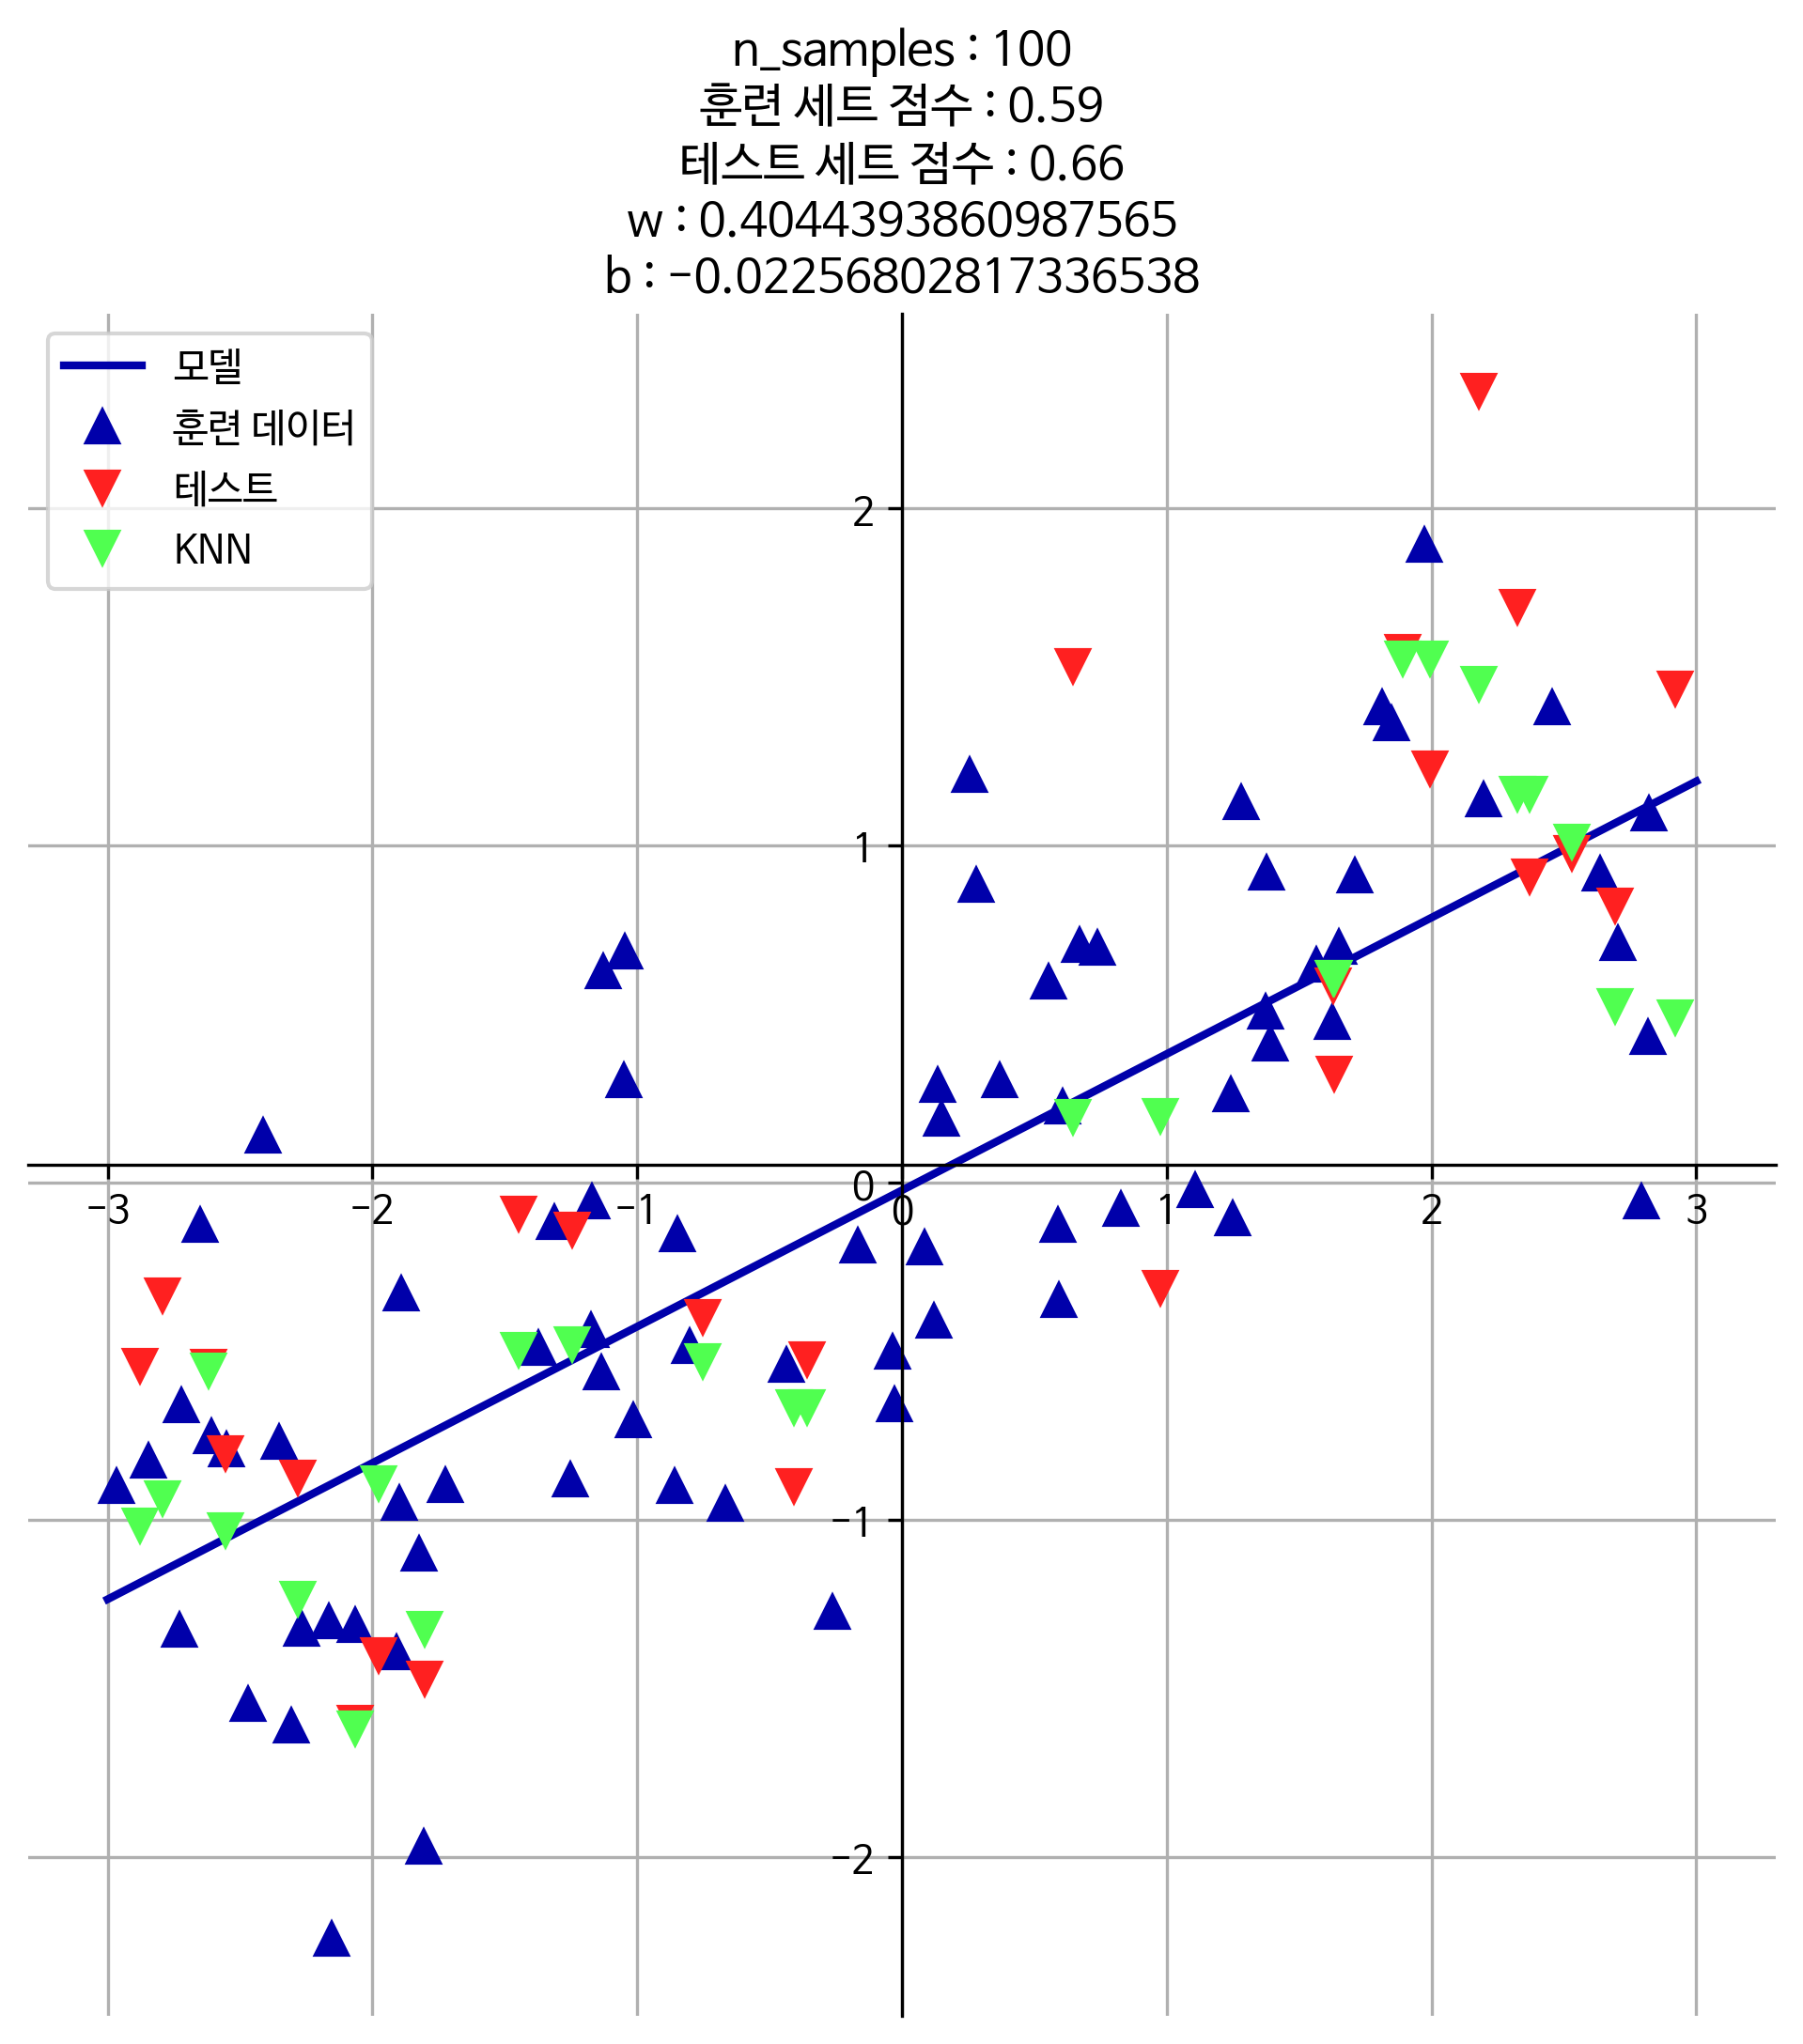

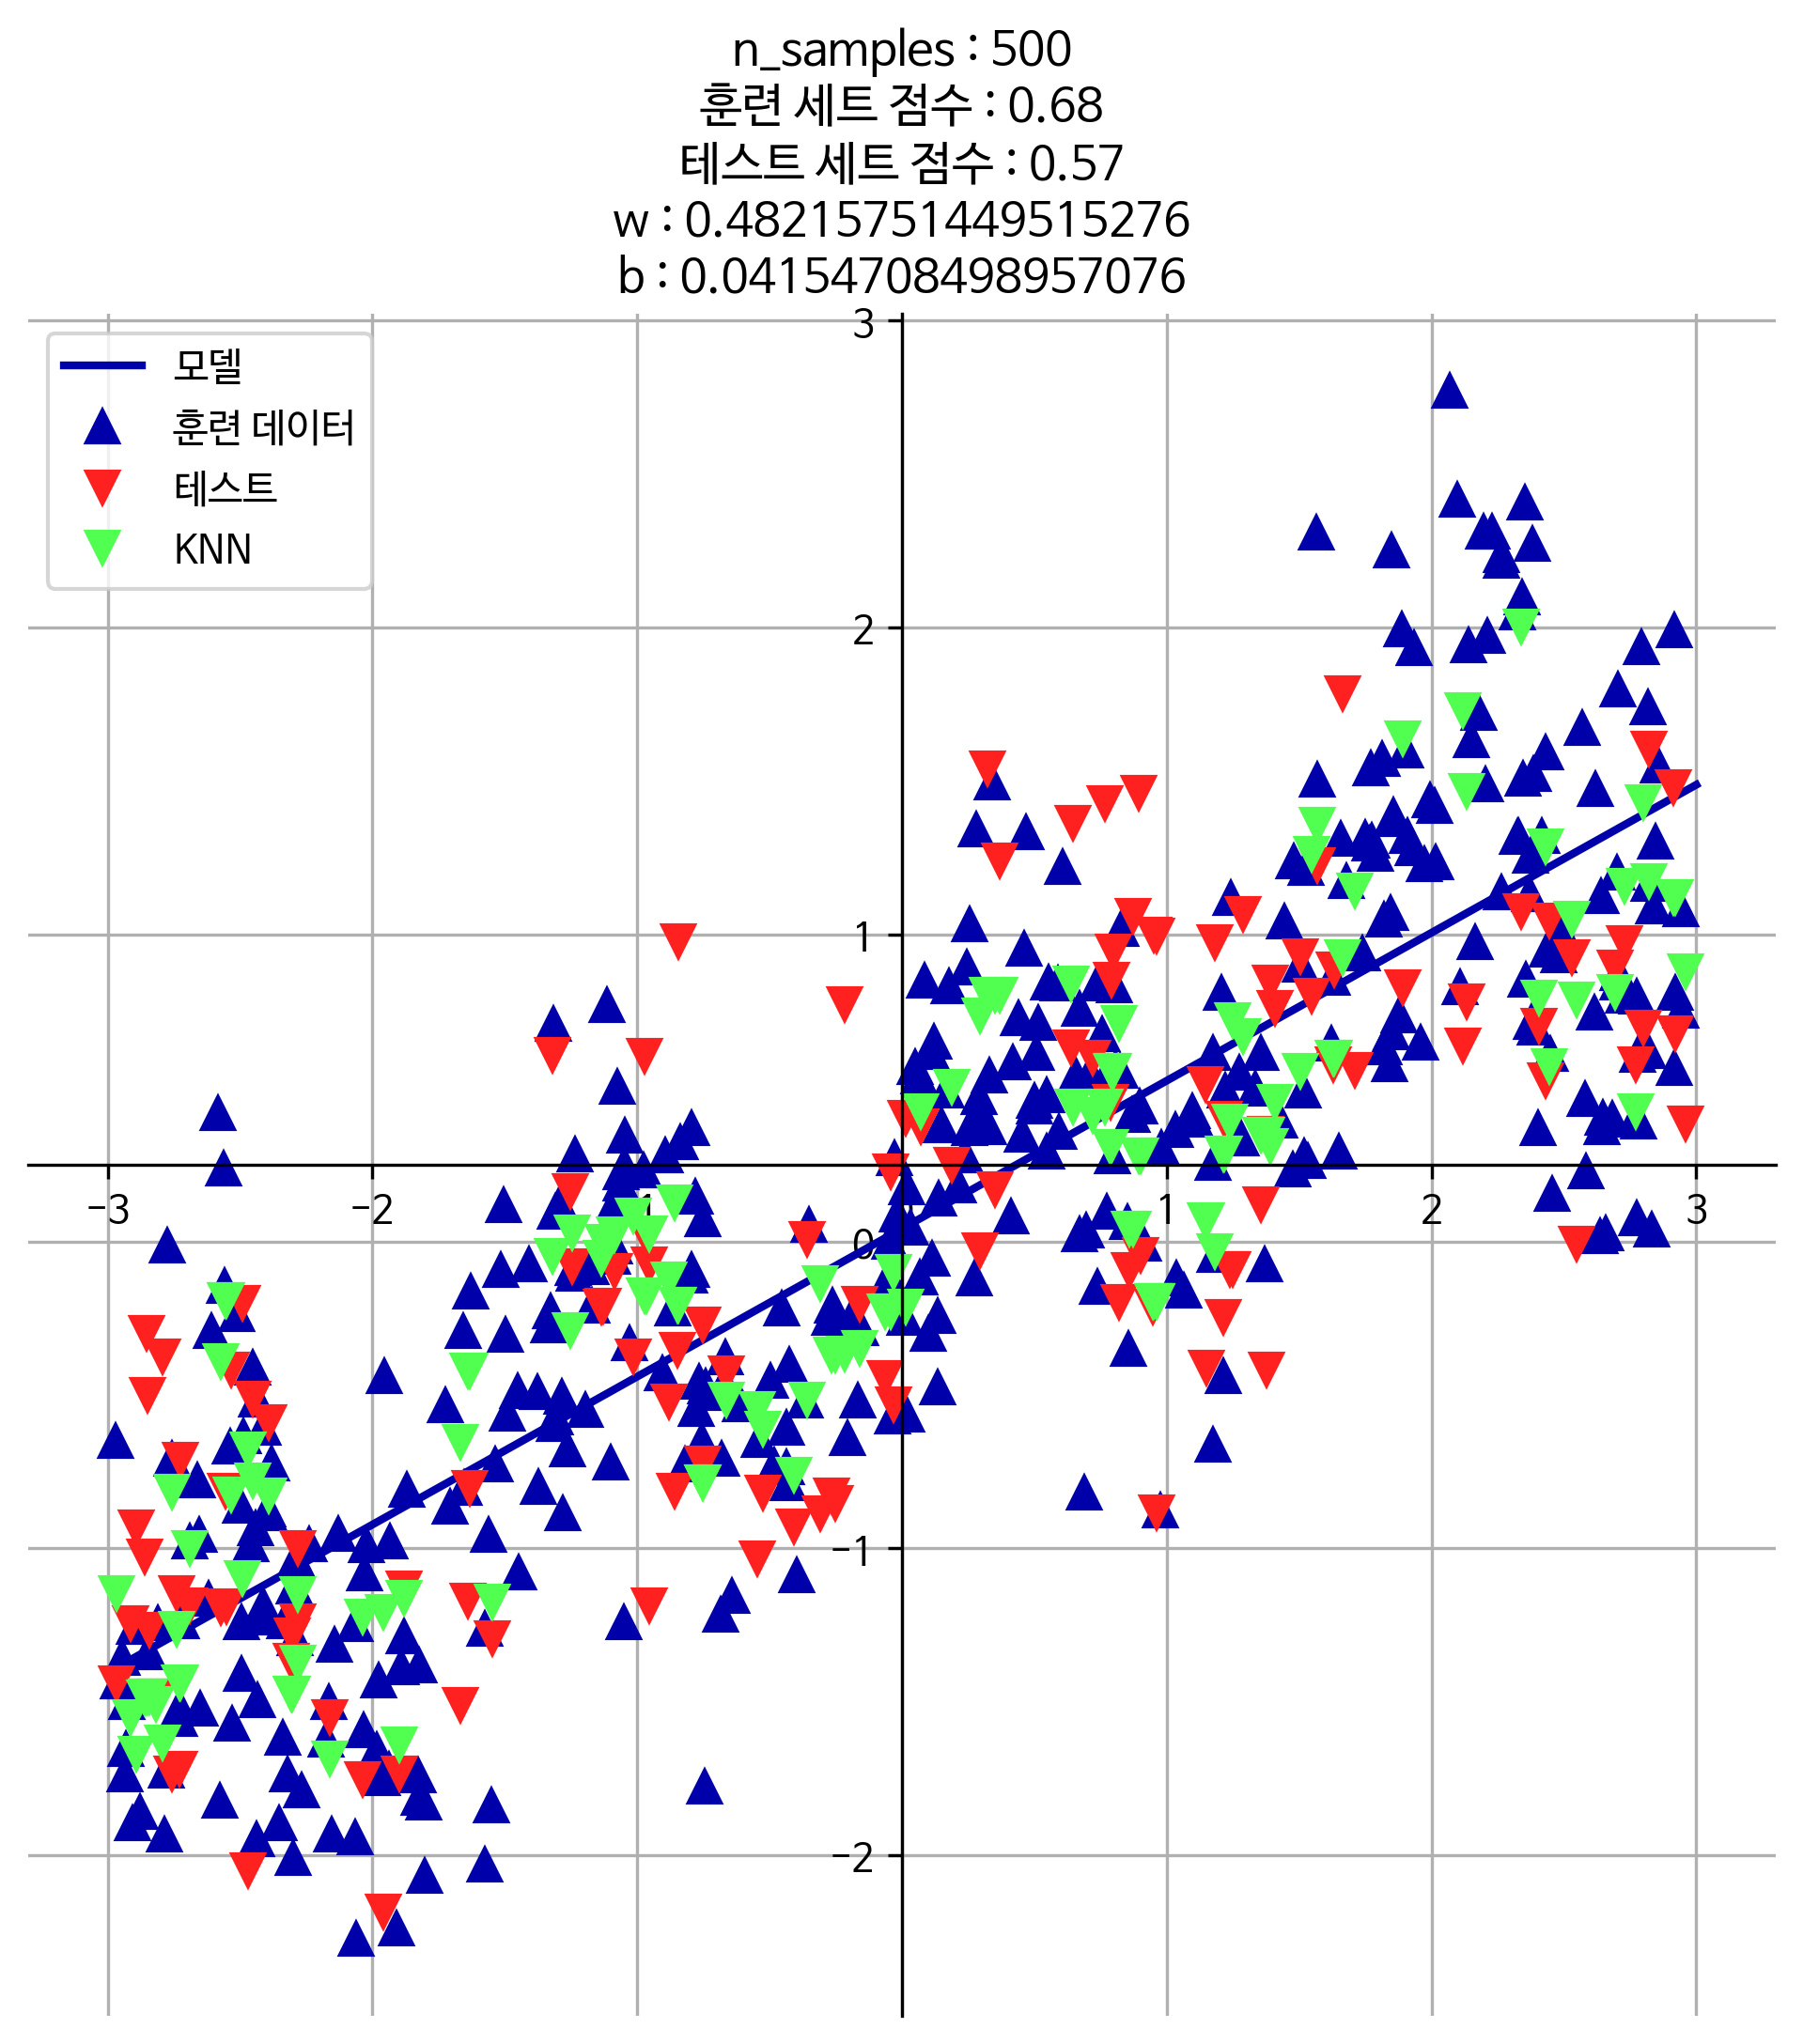

In [28]:
for n_samples in [40, 100, 500]:
    X, y = mglearn.datasets.make_wave(n_samples=n_samples)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    lr = LinearRegression().fit(X_train, y_train)
    reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
    
    plt.figure(figsize=(8, 8))
    line = np.linspace(-3, 3, 1000).reshape(-1, 1)
    plt.plot(line, lr.predict(line))
    plt.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    plt.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    plt.plot(X_test, reg.predict(X_test), 'v', c=mglearn.cm3(2), markersize=8)
    
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.set_title(f"n_samples : {n_samples}\n훈련 세트 점수 : {lr.score(X_train, y_train):.2f}\n테스트 세트 점수 : {lr.score(X_test, y_test):.2f}\nw : {lr.coef_[0]}\nb : {lr.intercept_}")
    ax.legend(["모델", "훈련 데이터", "테스트", "KNN"], loc="best")
    ax.grid(True)

# 보스톤 주택 가격 예측

# 데이터 살펴보기

In [29]:
from sklearn.datasets import load_boston
boston = load_boston()
print("boston.keys() : \n", boston.keys())
print("데이터의 형태:", boston.data.shape)
print("특성 이름 : \n", boston.feature_names)
print("boston.target : \n", boston.target)
print(boston['DESCR'] + "\n...")

df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.head())

boston.keys() : 
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
데이터의 형태: (506, 13)
특성 이름 : 
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
boston.target : 
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4

# 방의 개수와 주택가격 산점도

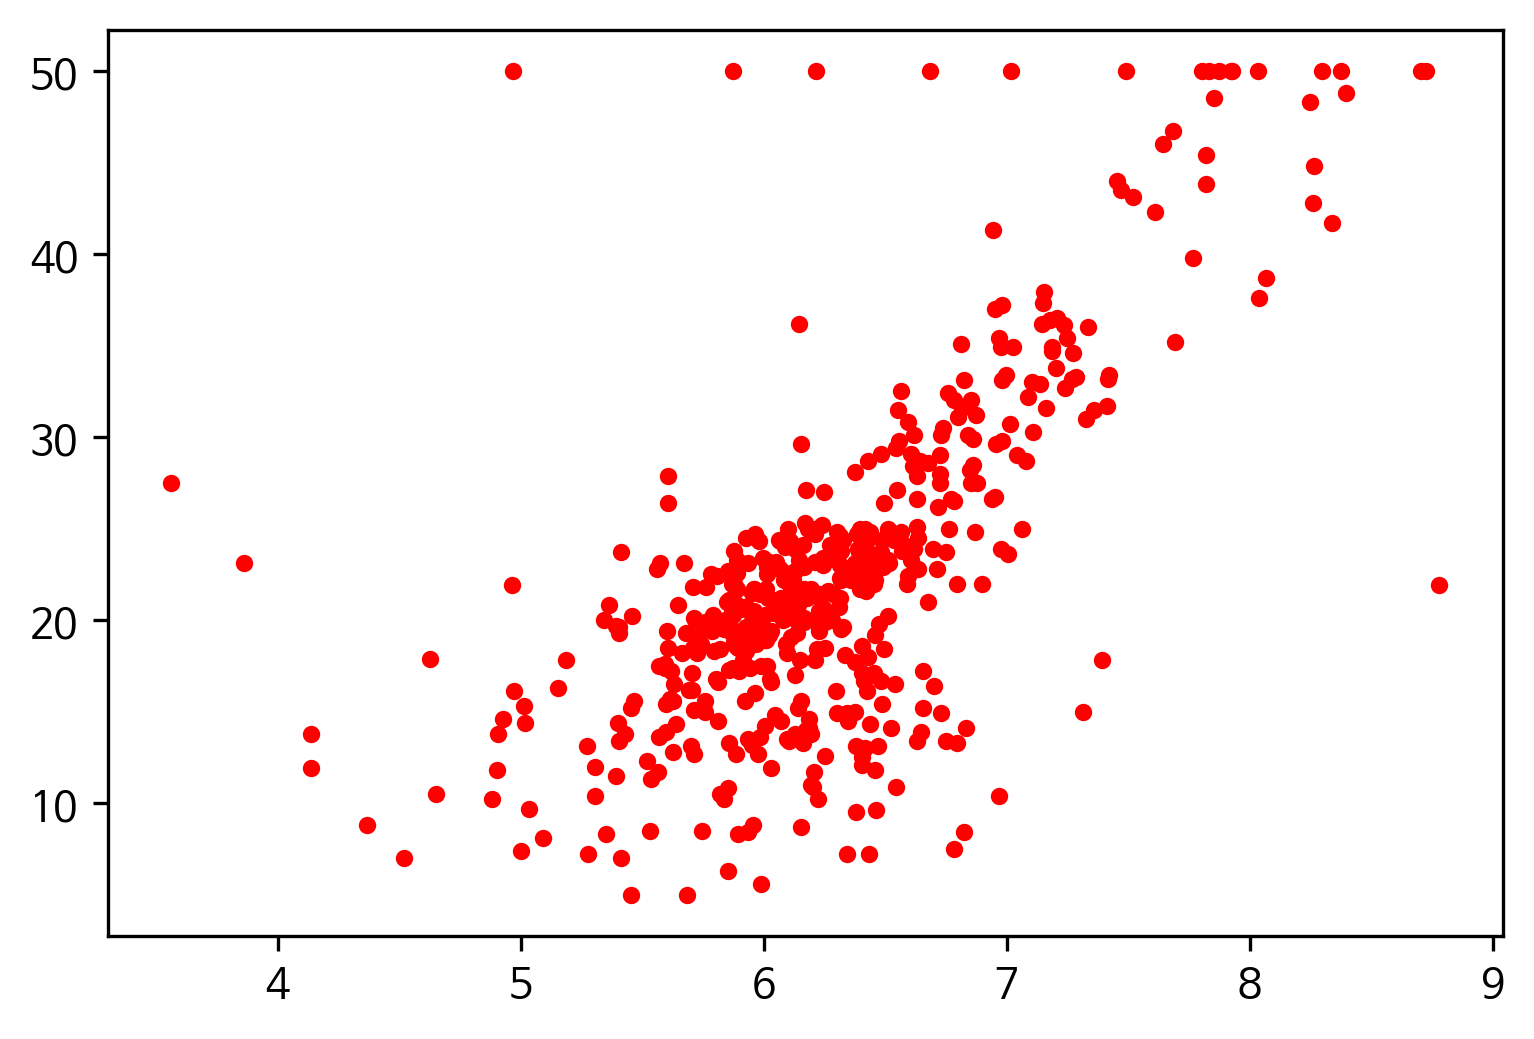

In [30]:
plt.scatter(boston.data[:, 5], boston.target, color='r', s=10)

# 속성(특징) 하나로 선형회귀 실험

In [32]:
X = boston.data[:, 5]
print(X.shape)

# LinearRegression의 함수에 인자로 전달하기 위해서는
# 각 원소의 값이 담긴 2차원 배열을 (n, 1)의 형태로 만들어야 함
# atleast_2d 함수는 x데이터를 2차원 배열을 (1, n) 형태로 만들어준다.
X_1 = np.atleast_2d(X)
X_2 = np.transpose(X_1)
print(X_2.shape)
y = boston.target

lr.fit(X_2, y)

y_predicted = lr.predict(X_2)

print("w[0] : %f, b : %f"%(lr.coef_[0], lr.intercept_))

(506,)
(506, 1)
w[0] : 9.102109, b : -34.670621


# 선형 회귀모델 그리기

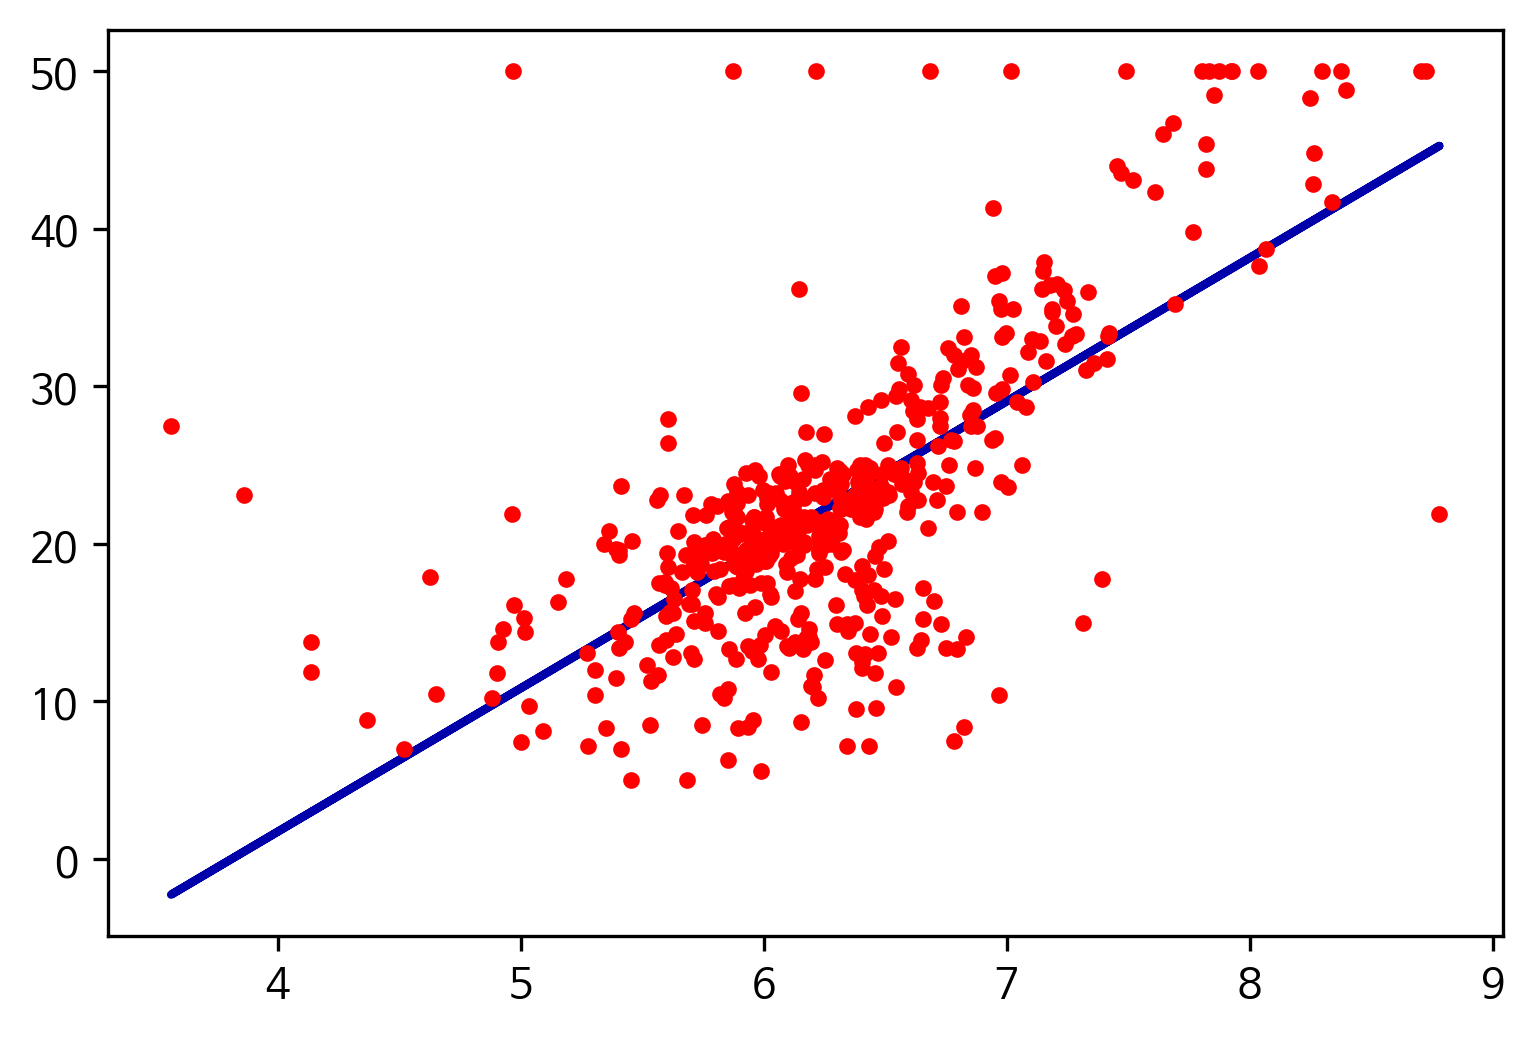

In [33]:
plt.plot(X_2, y_predicted)
plt.plot(X_2, y, 'o', color='r', markersize=3)

# 선형회귀모델의 성능 측정

In [34]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X_train.shape : (379, 13) X_test.shape : (127, 13)
훈련 세트 점수: 0.77
테스트 세트 점수: 0.64


In [37]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
for n_neighbors in range(1, 11):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    print("k : {}".format(n_neighbors))
    print("훈련 세트 점수: {:.2f}".format(reg.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(reg.score(X_test, y_test)))

X_train.shape : (379, 13) X_test.shape : (127, 13)
k : 1
훈련 세트 점수: 1.00
테스트 세트 점수: 0.25
k : 2
훈련 세트 점수: 0.84
테스트 세트 점수: 0.46
k : 3
훈련 세트 점수: 0.78
테스트 세트 점수: 0.51
k : 4
훈련 세트 점수: 0.74
테스트 세트 점수: 0.48
k : 5
훈련 세트 점수: 0.71
테스트 세트 점수: 0.46
k : 6
훈련 세트 점수: 0.68
테스트 세트 점수: 0.44
k : 7
훈련 세트 점수: 0.67
테스트 세트 점수: 0.41
k : 8
훈련 세트 점수: 0.65
테스트 세트 점수: 0.39
k : 9
훈련 세트 점수: 0.62
테스트 세트 점수: 0.40
k : 10
훈련 세트 점수: 0.60
테스트 세트 점수: 0.39


테스트 점수를 보면 knn보다 선형회귀가 예측이 더 뛰어나다. 하지만 훈련 점수와 테스트 점수 둘다 만족스럽지 못한 점수로 과소적합인 것으로 보이므로 데이터를 더 수집하거나 특성공학을 통해 학습을 더 시켜야한다.

# 보스톤 확장 데이터

In [38]:
X, y = mglearn.datasets.load_extended_boston()

print("X.shape : {}".format(X.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))
lr = LinearRegression().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

X.shape : (506, 104)
X_train.shape : (379, 104) X_test.shape : (127, 104)
훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [39]:
for n_neighbors in range(1, 11):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    print("k : {}".format(n_neighbors))
    print("훈련 세트 점수: {:.2f}".format(reg.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(reg.score(X_test, y_test)))

k : 1
훈련 세트 점수: 1.00
테스트 세트 점수: 0.65
k : 2
훈련 세트 점수: 0.94
테스트 세트 점수: 0.65
k : 3
훈련 세트 점수: 0.90
테스트 세트 점수: 0.61
k : 4
훈련 세트 점수: 0.87
테스트 세트 점수: 0.60
k : 5
훈련 세트 점수: 0.83
테스트 세트 점수: 0.56
k : 6
훈련 세트 점수: 0.81
테스트 세트 점수: 0.56
k : 7
훈련 세트 점수: 0.80
테스트 세트 점수: 0.54
k : 8
훈련 세트 점수: 0.78
테스트 세트 점수: 0.56
k : 9
훈련 세트 점수: 0.76
테스트 세트 점수: 0.55
k : 10
훈련 세트 점수: 0.75
테스트 세트 점수: 0.54


특성공학을 통해 데이터를 확장하였을 때는 knn의 k가 2일때 선형회귀보다 우세하나 두 모델 모두 훈련 점수가 높은 과대적합 상태이다. 과대적합을 해소하여 일반화된 모델을 찾기 위한 노력이 필요하다.

# 릿지 회귀(Ridge Regression)

In [40]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


In [41]:
# linear regression
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


In [42]:
# KNN regression
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(reg.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(reg.score(X_test, y_test)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.61


alpha 10
훈련 세트 점수: 0.79
테스트 세트 점수: 0.64
alpha 0.1
훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


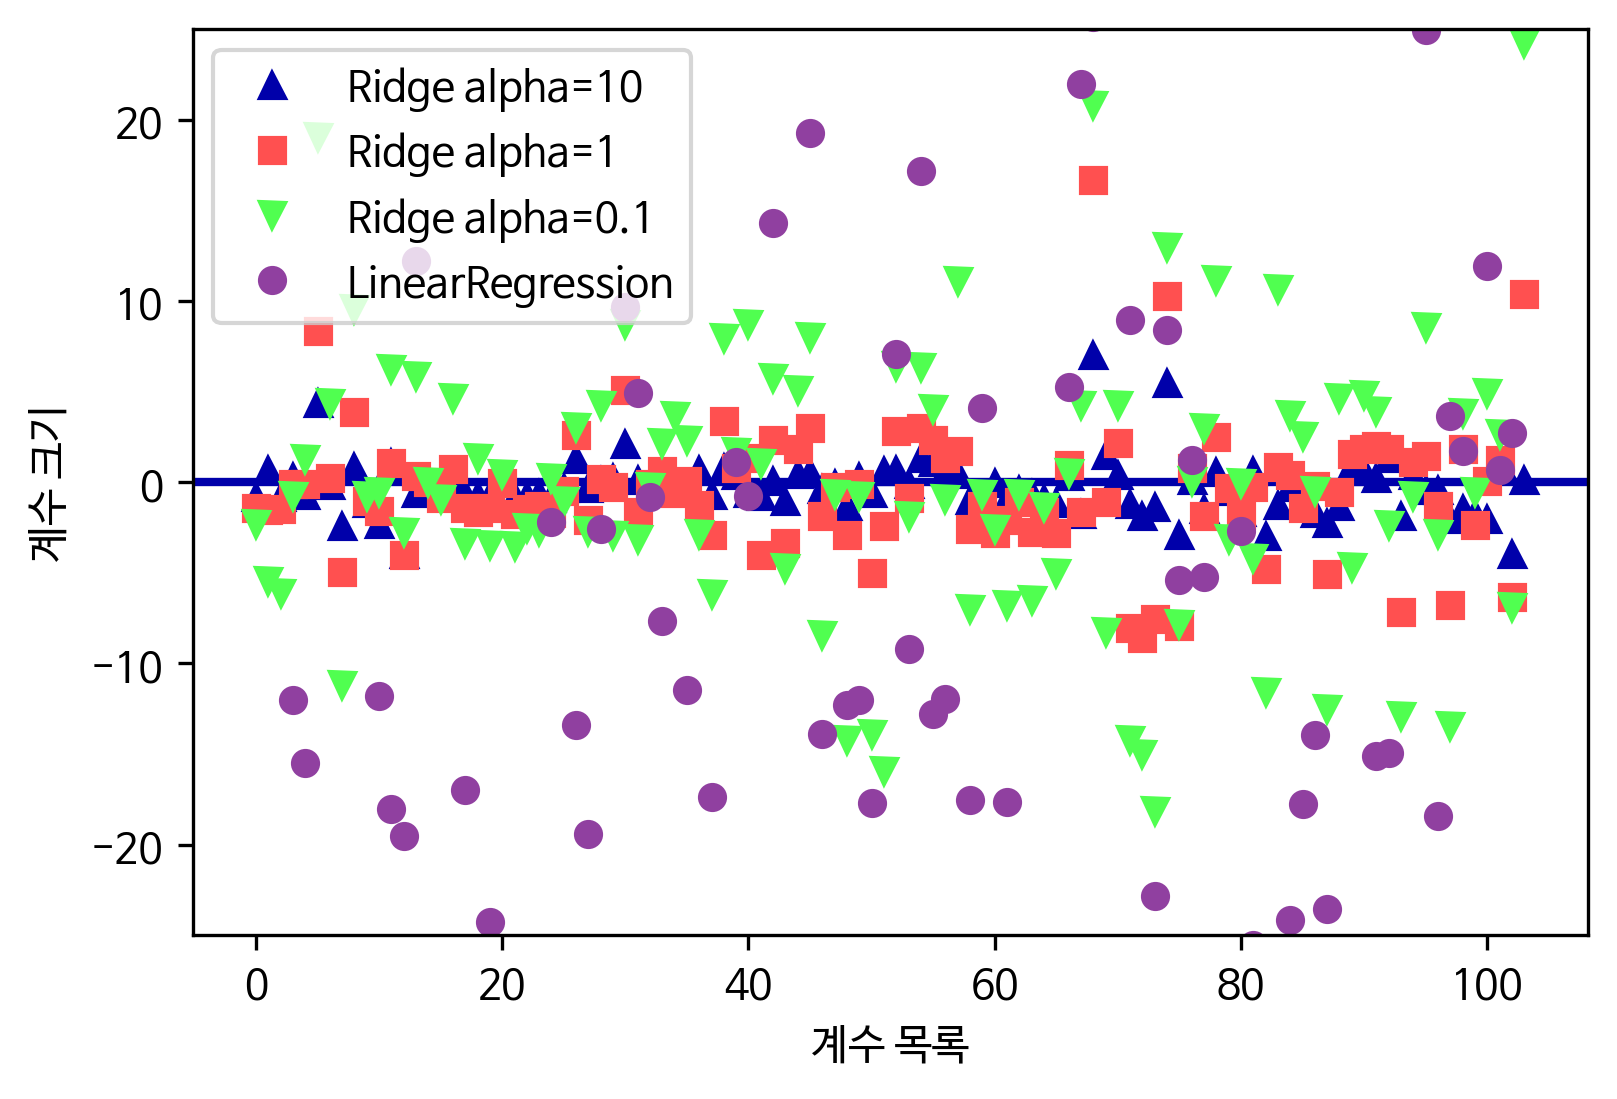

In [44]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("alpha 10")
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("alpha 0.1")
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

# Alpha에 따른 결과

In [45]:
from sklearn.linear_model import Ridge

for alpha in [0.01, 0.1, 1, 10]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    print("alpha : {}".format(alpha))
    print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
    print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

alpha : 0.01
훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.70
alpha : 0.1
훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77
alpha : 1
훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75
alpha : 10
훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


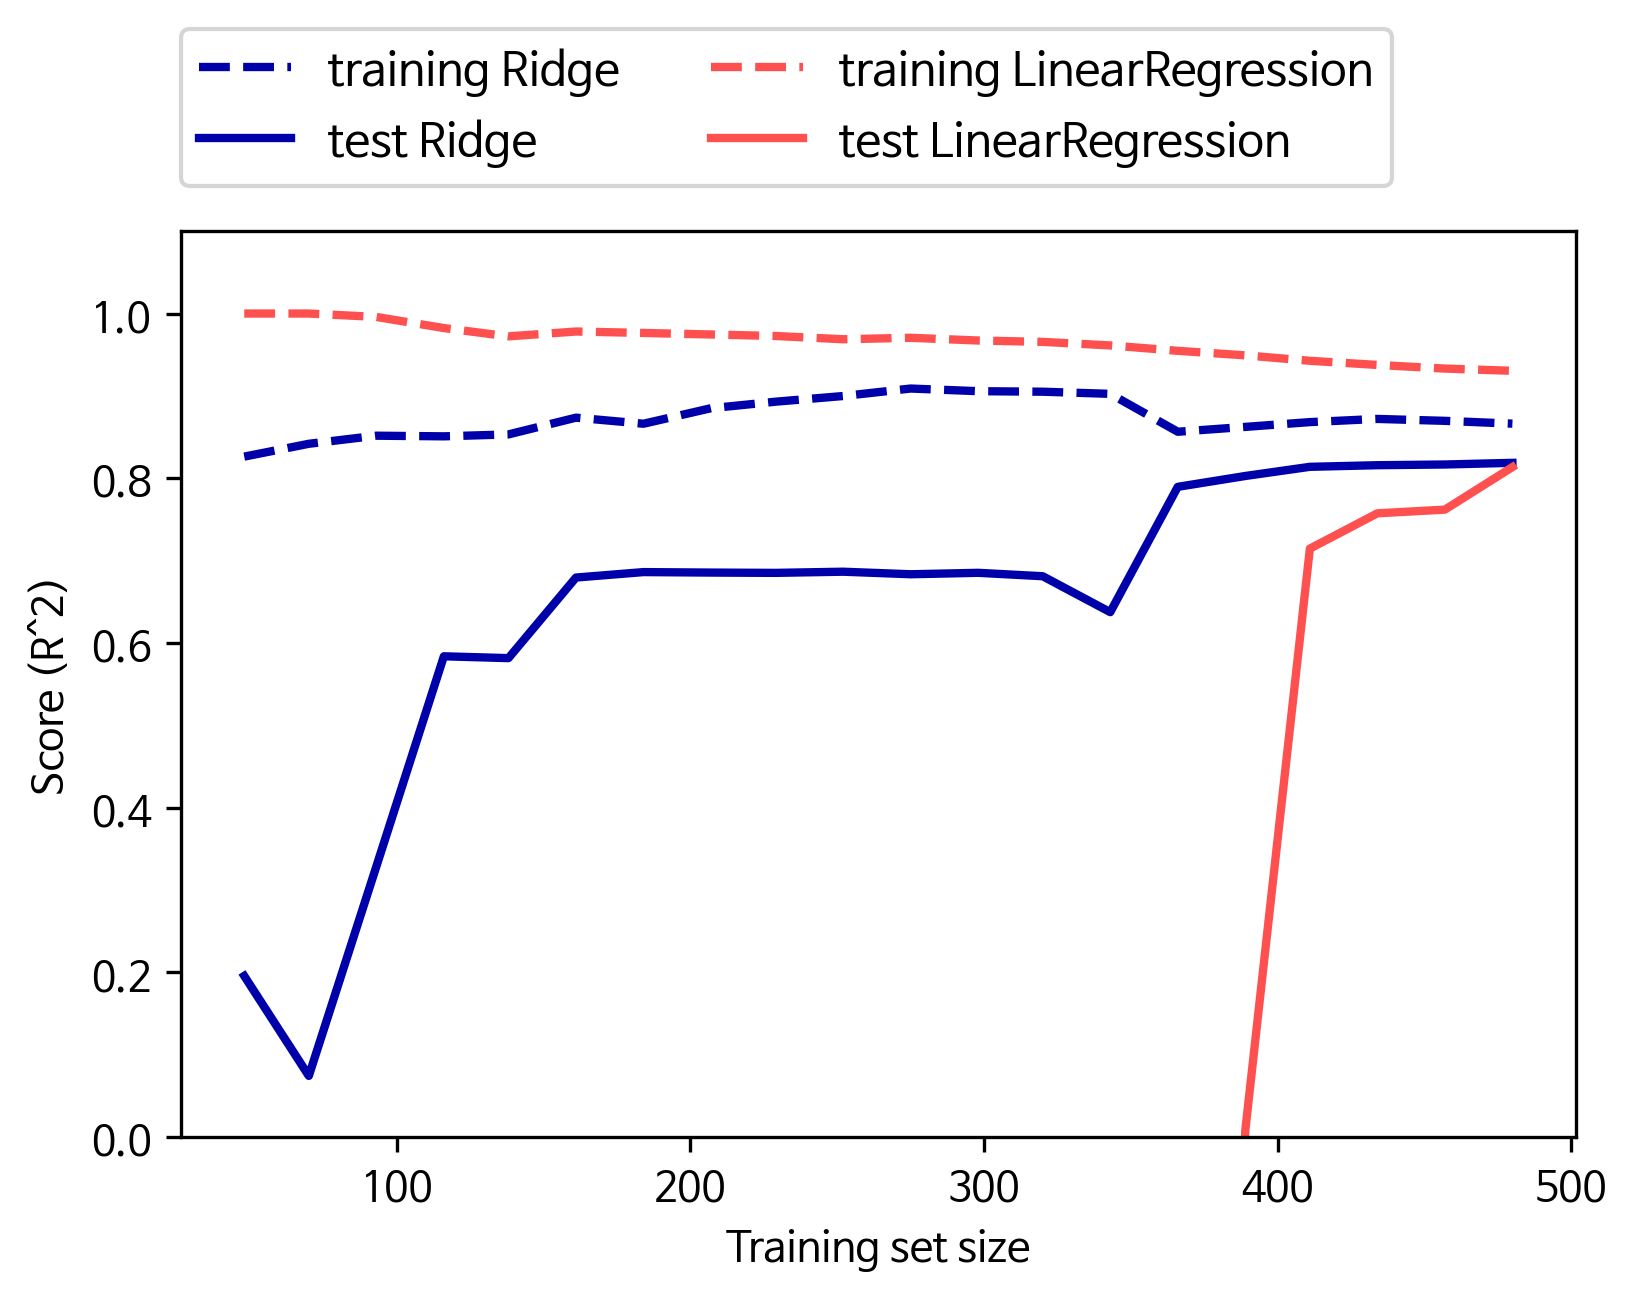

In [46]:
mglearn.plots.plot_ridge_n_samples()

# 라쏘 회귀

In [47]:
from sklearn.linear_model import Lasso

# alpha = 1
# 낮은 성능, 적은 특성 사용, 과소적합
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [48]:
# alpha = 0.01
# 패널티 효과 감소, 복잡도 증가
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [49]:
# alpha를 아주 작게 하면 선형 모델과 유사
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


In [50]:
print("계수값 : \n", lasso.coef_)
print(np.where(lasso.coef_ != 0))

계수값 : 
 [-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.    -0.
 -0.     0.    -5.353 -0.     0.    -0.     0.    -0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.     0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.    -0.
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.     0.     0.
  0.    -0.    -0.    -0.     0.    -0.    -0.     0.    -0.    -1.051
 -3.31  -0.    -0.     0.    -0.    -0.    -0.     0.    -0.    -0.414
 -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.    -0.
 -0.     0.    -0.    -0.   ]
(array([12, 79, 80, 89], dtype=int64),)


Text(0, 0.5, '계수 크기')

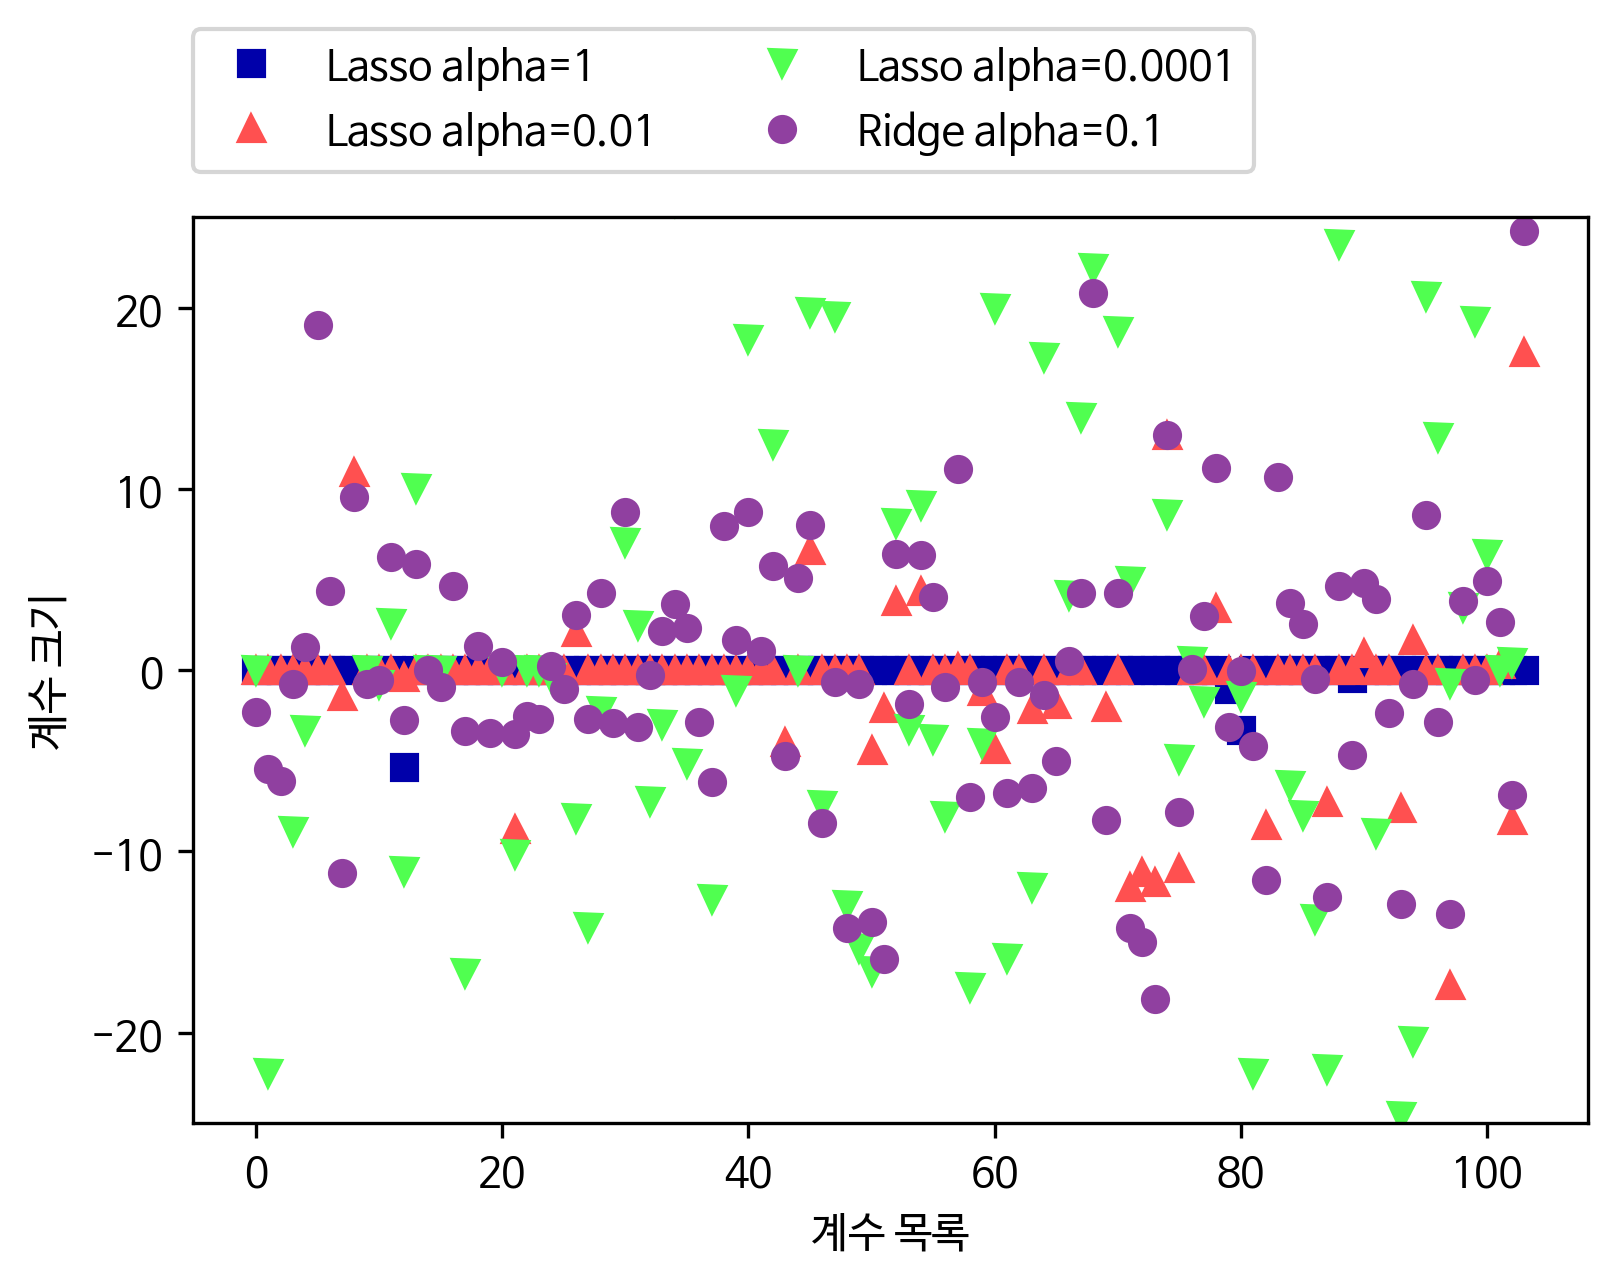

In [51]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

# IRIS 로지스틱회귀 분류

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()

print(list(iris.keys()))
print("타깃의 이름 : {}".format(iris['target_names']))
print("특성의 이름 : {}".format(iris['feature_names']))
X = iris['data'][:,3:] # petal width
print(X.shape)
y = (iris['target']==2).astype(np.int) # 'virginica'면 1 아니면 0
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름 : ['setosa' 'versicolor' 'virginica']
특성의 이름 : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


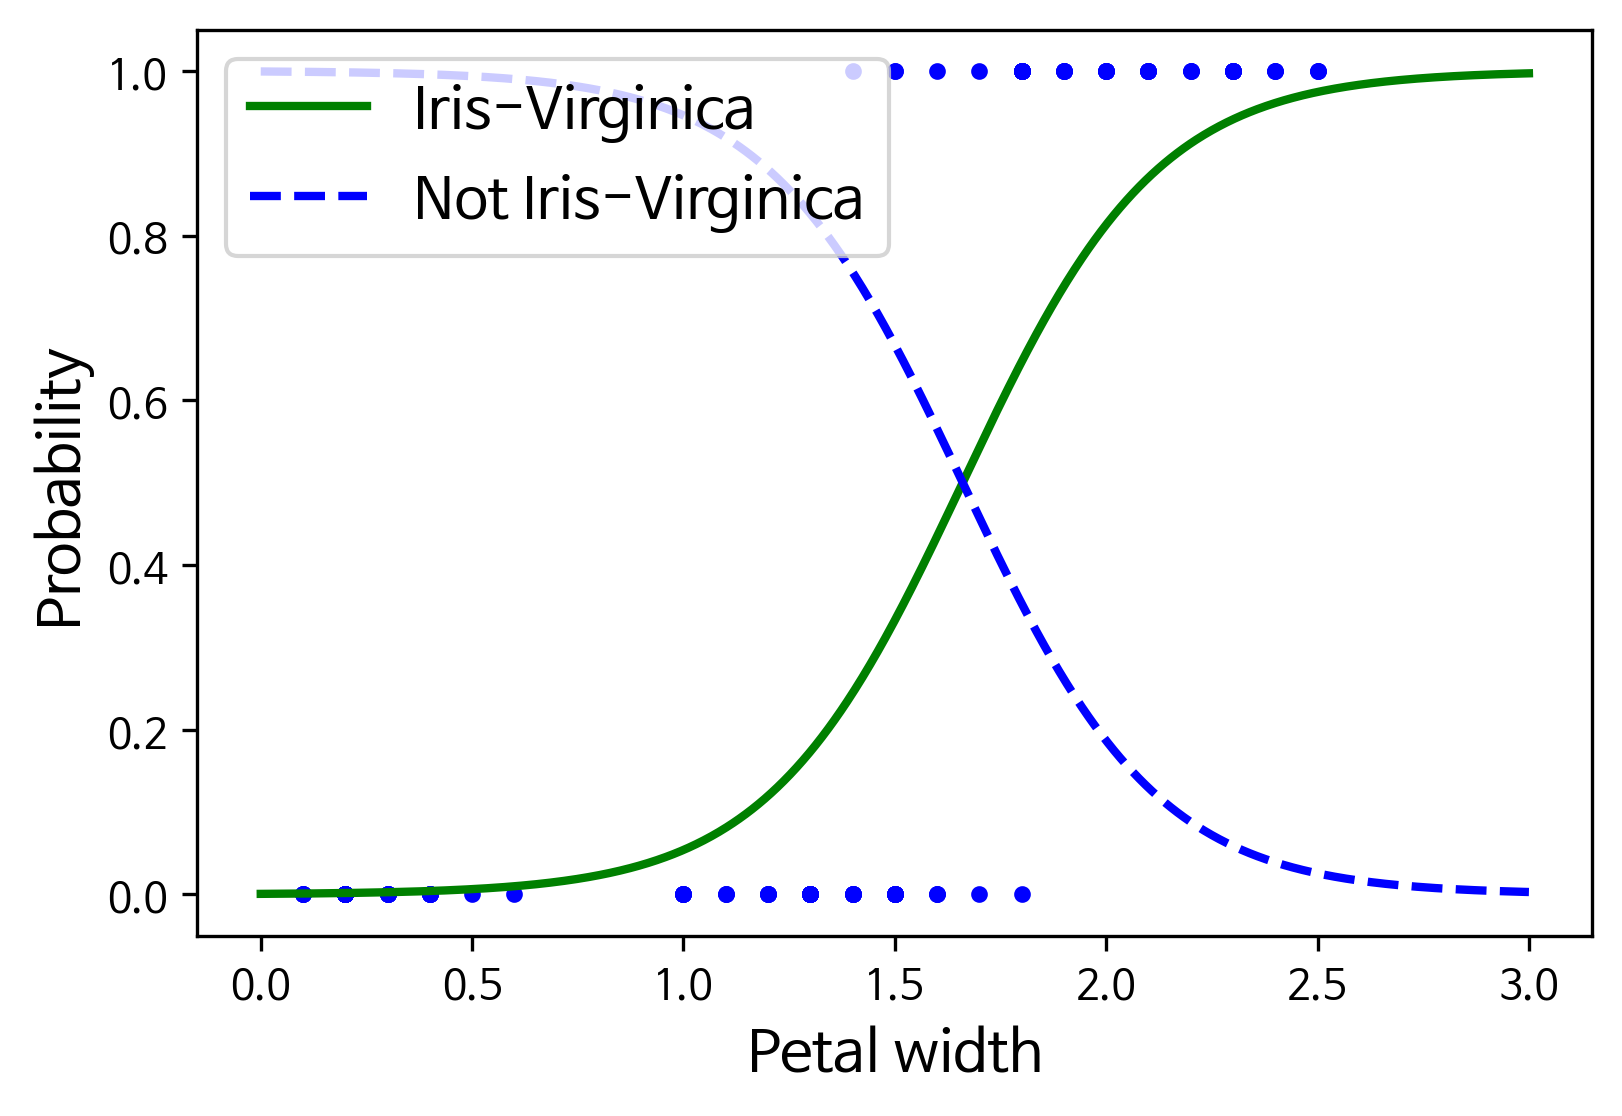

In [55]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

# 꽃잎의 너비가 0~3cm인 꽃에 대해 모델의 추정확률
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

# 로지스틱 회귀분석

C:\Users\wkdwl\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\Users\wkdwl\Anaconda3\envs\ML\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


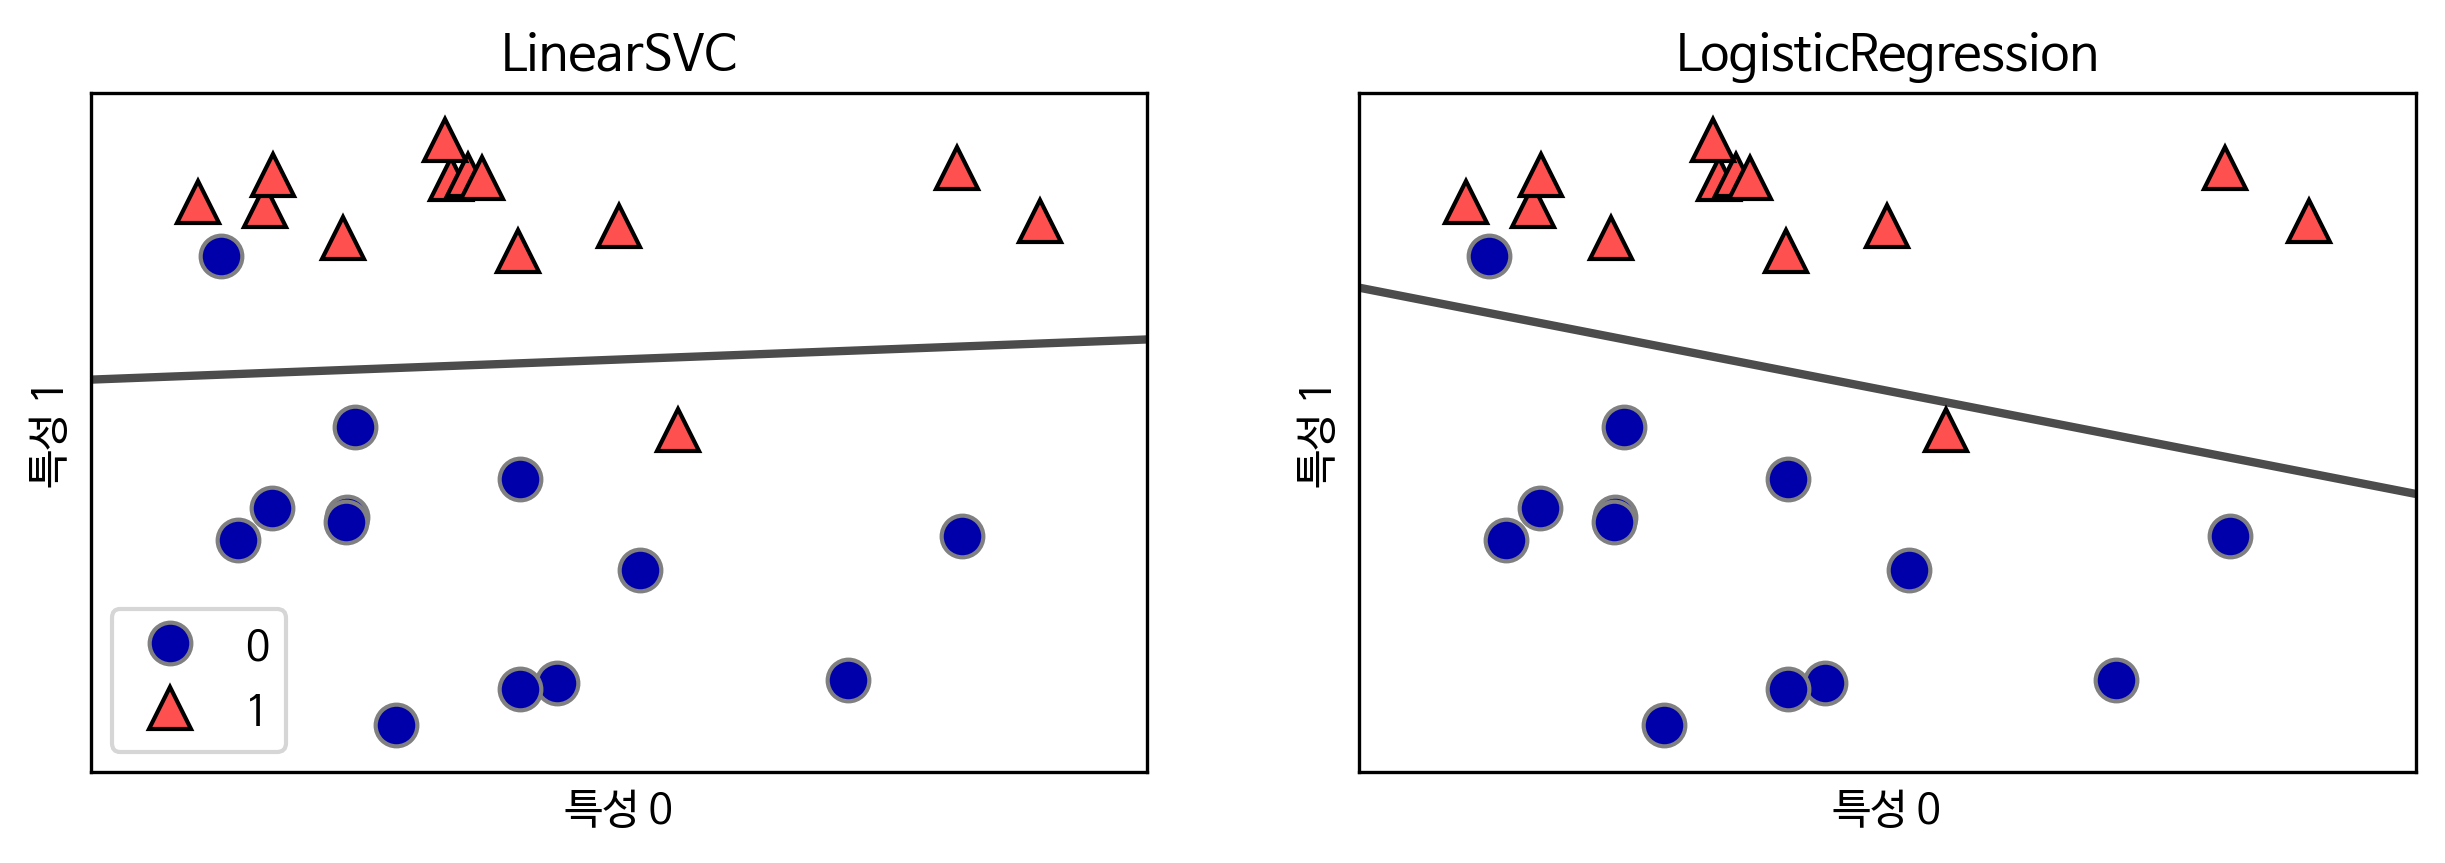

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

# cancer data 분류 : malignant vs benign

In [57]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test, y_test)))

훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


In [58]:
# C : 100
# 패널티가 작아진다. 규제완화, 훈련세트에 맞추려함. 개개의 포인터에 맞추려함.
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test, y_test)))

훈련 세트 점수: 0.984
테스트 세트 점수: 0.965


In [59]:
# C : 0.01
# 규제강화, 패널티가 커진다. 계수를 0에 가깝게, 다수의 포인터에 맞추려함.
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test, y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.951


C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98


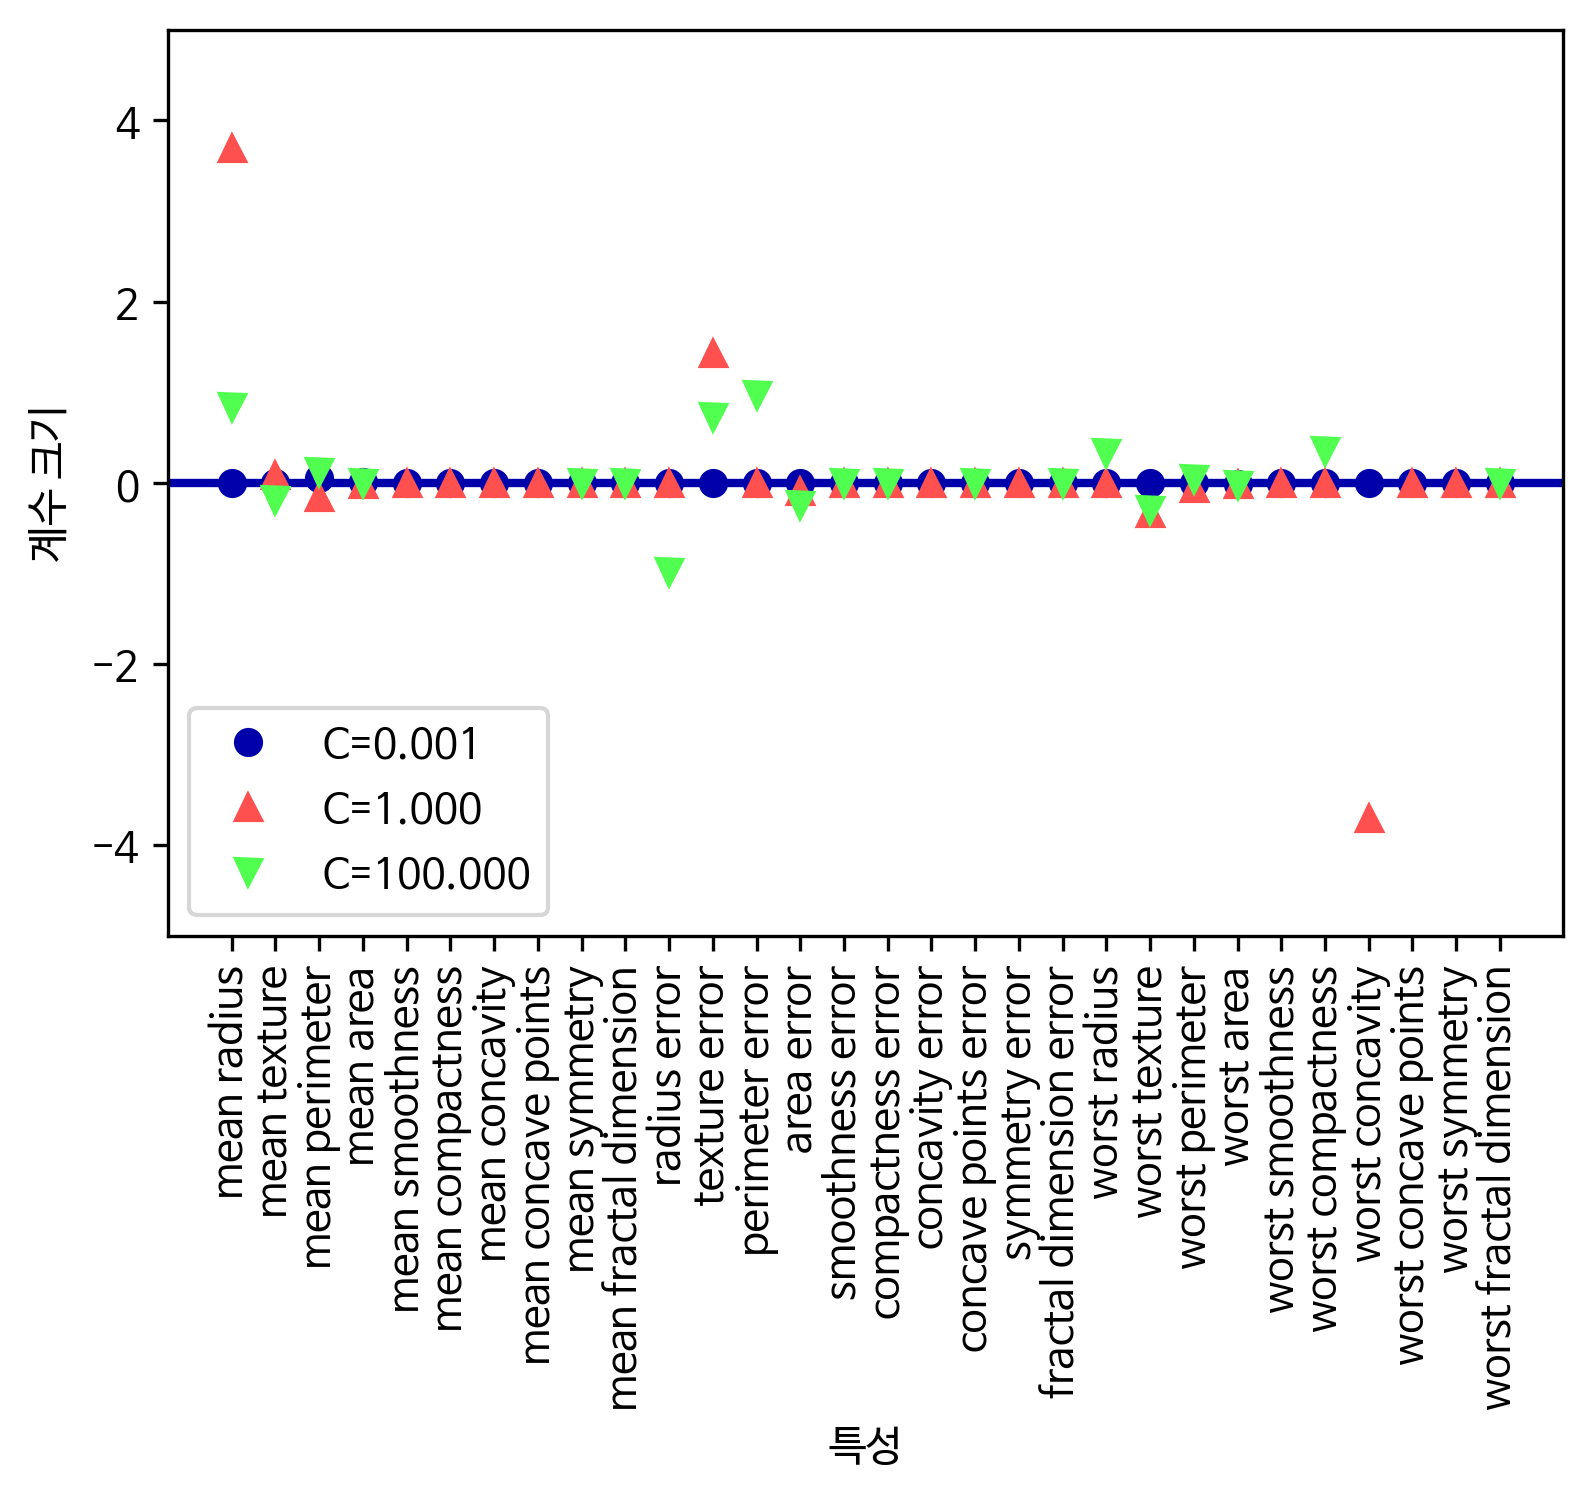

In [66]:
# L1규제
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

C=0.001 인 l2 로지스틱 회귀의 훈련 정확도: 0.95
C=0.001 인 l2 로지스틱 회귀의 테스트 정확도: 0.94
C=1.000 인 l2 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l2 로지스틱 회귀의 테스트 정확도: 0.96
C=100.000 인 l2 로지스틱 회귀의 훈련 정확도: 0.98
C=100.000 인 l2 로지스틱 회귀의 테스트 정확도: 0.97


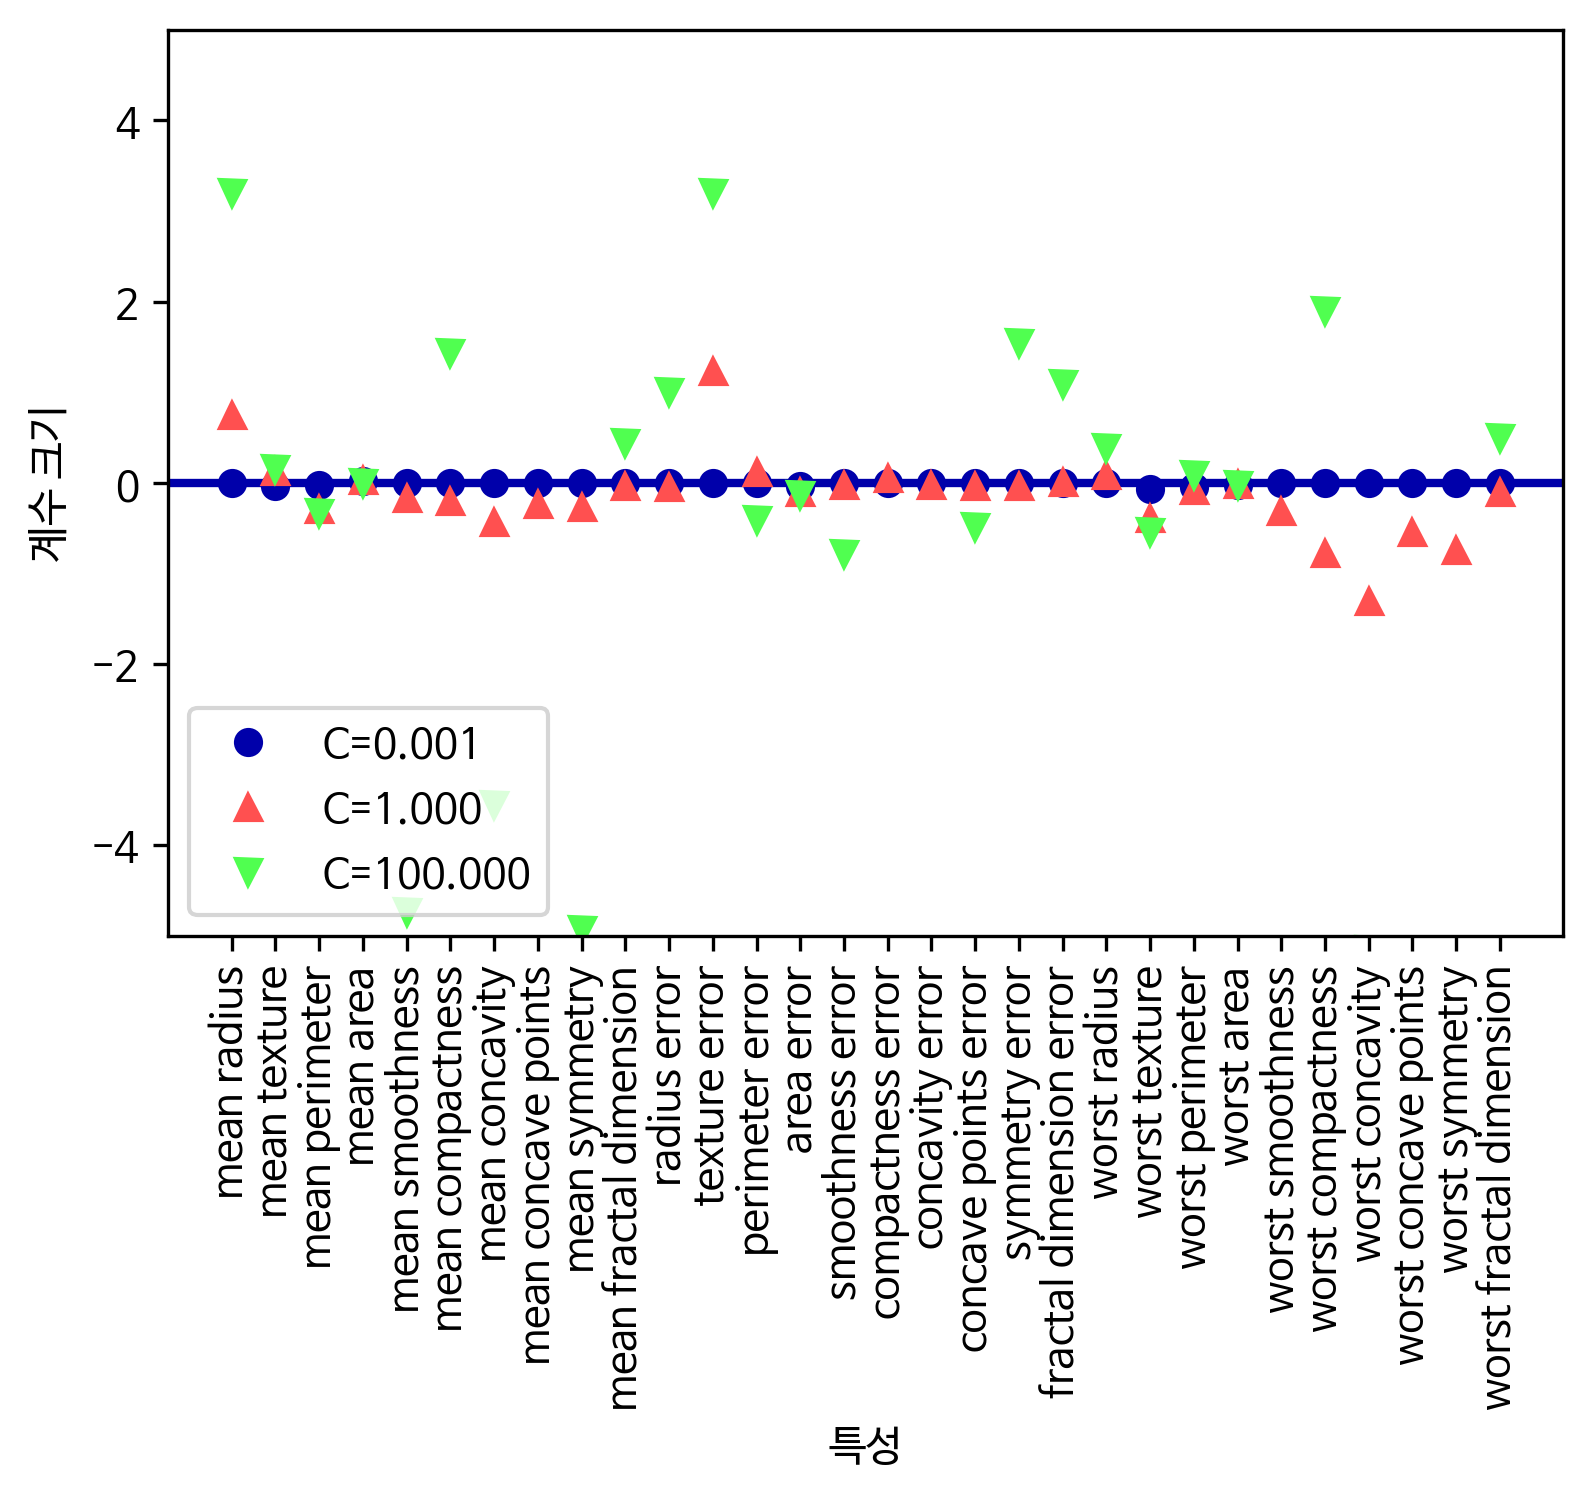

In [67]:
# L2규제
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l2 = LogisticRegression(C=C, max_iter=10000).fit(X_train, y_train)
    print("C={:.3f} 인 l2 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l2.score(X_train, y_train)))
    print("C={:.3f} 인 l2 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l2.score(X_test, y_test)))
    plt.plot(lr_l2.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5, 5)
plt.legend(loc=3)

# L1규제

In [68]:
for C in [0.001, 1, 100]:
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    print("사용한 특성의 개수:", np.sum(lr_l1.coef_ != 0))
    print("사용한 특성:", lr_l1.coef_)

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도: 0.91
C=0.001 인 l1 로지스틱 회귀의 테스트 정확도: 0.92
사용한 특성의 개수: 3
사용한 특성: [[ 0.     0.     0.057  0.005  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.    -0.01   0.     0.     0.     0.     0.     0.   ]]
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.96
C=1.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.96
사용한 특성의 개수: 10
사용한 특성: [[ 3.697  0.081 -0.163 -0.012  0.     0.     0.     0.     0.     0.
   0.     1.432  0.    -0.093  0.     0.     0.     0.     0.     0.
   0.    -0.33  -0.055 -0.017  0.     0.    -3.691  0.     0.     0.   ]]
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도: 0.99
C=100.000 인 l1 로지스틱 회귀의 테스트 정확도: 0.98
사용한 특성의 개수: 23
사용한 특성: [[  0.821  -0.192   0.113  -0.004 -11.545  65.671  -5.591 -86.397   0.
    0.     -0.94    0.73    0.935  -0.245   0.      0.     36.37    0.
   34.774   0.      0.32   -0.304   0.044  -0.023 -50.784   0.313 -10.483
  -45.106 -19.608   0.   ]]
